# Importar e Filtrar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importar

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

Carregar os dados

In [ ]:
caminho_dofet23 = '/content/drive/MyDrive/CDS/DOFET23 - DOFET23.csv'
caminho_doinf23 = '/content/drive/MyDrive/CDS/DOINF23 - DOINF23.csv'

df_dofet23 = pd.read_csv(caminho_dofet23, encoding='latin1')
df_doinf23 = pd.read_csv(caminho_doinf23, encoding='latin1')

/tmp/ipython-input-3-3416957493.py:4: DtypeWarning: Columns (90) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dofet23 = pd.read_csv(caminho_dofet23, encoding='latin1')
/tmp/ipython-input-3-3416957493.py:5: DtypeWarning: Columns (79) have mixed types. Specify dtype option on import or set low_memory=False.
  df_doinf23 = pd.read_csv(caminho_doinf23, encoding='latin1')


In [ ]:
print(df_dofet23.head())
print(df_doinf23.head())

   ORIGEM  CODMUNCART  NUMREGCART  CODCART  DTREGCART  TIPOBITO  DTOBITO  \
0       1         NaN         NaN      NaN        NaN         1  1012023   
1       1         NaN         NaN      NaN        NaN         1  1012023   
2       1         NaN         NaN      NaN        NaN         1  1012023   
3       1         NaN         NaN      NaN        NaN         1  1012023   
4       1         NaN         NaN      NaN        NaN         1  1012023   

   HORAOBITO  NATURAL  CODMUNNATU  ...  FONTES  TPRESGINFO  TPNIVELINV  \
0      750.0    822.0    220095.0  ...  XXXSXX         NaN         NaN   
1     1750.0    822.0    220800.0  ...  SXSSXX         NaN         NaN   
2        NaN    813.0    130310.0  ...  XXXSXX         NaN         NaN   
3      245.0    833.0    330455.0  ...  XXSXXX         NaN         NaN   
4      855.0      NaN         NaN  ...  SXSSXX         NaN         NaN   

   NUDIASINF    DTCADINF  MORTEPARTO   DTCONCASO  FONTESINF  ALTCAUSA  \
0        NaN  17102024.0 

Filtrar colunas relevantes

In [ ]:
colunas_relevantes_fetal = ['DTOBITO', 'HORAOBITO', 'NATURAL', 'SEXO', 'CODMUNRES', 'LOCOCOR', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE', 'OCUPMAE',
                            'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'CAUSABAS',
                            'TPPOS', 'CAUSABAS_O', 'ATESTADO', 'ESCMAEAGR1', 'DIFDATA', 'MORTEPARTO']

colunas_relevantes_infantil = ['NATURAL', 'IDADE', 'SEXO', 'RACACOR', 'CODMUNRES', 'LOCOCOR', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE', 'OCUPMAE',
                               'PESO', 'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'CAUSABAS', 'TPPOS', 'CAUSABAS_O', 'ATESTADO', 'ESCMAEAGR1',
                               'DIFDATA', 'MORTEPARTO', 'SEMAGESTAC', 'PARTO', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'GESTACAO']

df_dofet23_filtrado = df_dofet23[colunas_relevantes_fetal]
df_doinf23_filtrado = df_doinf23[colunas_relevantes_infantil]

In [ ]:
print(df_dofet23_filtrado.columns)
print(df_doinf23_filtrado.columns)

Index(['DTOBITO', 'HORAOBITO', 'NATURAL', 'SEXO', 'CODMUNRES', 'LOCOCOR',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC',
       'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'ASSISTMED', 'EXAME',
       'CIRURGIA', 'CAUSABAS', 'TPPOS', 'CAUSABAS_O', 'ATESTADO', 'ESCMAEAGR1',
       'DIFDATA', 'MORTEPARTO'],
      dtype='object')
Index(['NATURAL', 'IDADE', 'SEXO', 'RACACOR', 'CODMUNRES', 'LOCOCOR',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'PESO', 'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED',
       'EXAME', 'CIRURGIA', 'CAUSABAS', 'TPPOS', 'CAUSABAS_O', 'ATESTADO',
       'ESCMAEAGR1', 'DIFDATA', 'MORTEPARTO', 'SEMAGESTAC', 'PARTO',
       'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'GESTACAO'],
      dtype='object')


In [ ]:
print("DOFET23")
print(df_dofet23_filtrado.info())
print("\nDOINF23")
print(df_doinf23_filtrado.info())

DOFET23
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26545 entries, 0 to 26544
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DTOBITO     26545 non-null  int64  
 1   HORAOBITO   25091 non-null  float64
 2   NATURAL     23574 non-null  float64
 3   SEXO        26545 non-null  int64  
 4   CODMUNRES   26545 non-null  int64  
 5   LOCOCOR     26545 non-null  int64  
 6   CODMUNOCOR  26545 non-null  int64  
 7   IDADEMAE    25050 non-null  float64
 8   ESCMAE      24621 non-null  float64
 9   ESCMAE2010  24464 non-null  float64
 10  SERIESCMAE  9718 non-null   float64
 11  OCUPMAE     21895 non-null  float64
 12  QTDFILVIVO  25350 non-null  float64
 13  QTDFILMORT  24851 non-null  float64
 14  GRAVIDEZ    25991 non-null  float64
 15  SEMAGESTAC  25366 non-null  float64
 16  GESTACAO    25366 non-null  float64
 17  PARTO       25931 non-null  float64
 18  OBITOPARTO  25850 non-null  float64
 19  PESO        25194

# 3.1

Frequências de variáveis categóricas

In [ ]:
variaveis_categoricas_dofet = ['SEXO', 'ESCMAEAGR1', 'GRAVIDEZ', 'PARTO', 'ASSISTMED', 'LOCOCOR', 'NATURAL']
variaveis_categoricas_doinf = ['SEXO', 'ESCMAEAGR1', 'ASSISTMED', 'LOCOCOR', 'RACACOR', 'TPMORTEOCO', 'NATURAL']

print("\nDOFET - Frequências")
for var in variaveis_categoricas_dofet:
    print(f"\n{var}:\n", df_dofet23_filtrado[var].value_counts(dropna=False))

print("\nDOINF - Frequências")
for var in variaveis_categoricas_doinf:
    print(f"\n{var}:\n", df_doinf23_filtrado[var].value_counts(dropna=False))


DOFET - Frequências

SEXO:
 SEXO
1    13767
2    11991
0      787
Name: count, dtype: int64

ESCMAEAGR1:
 ESCMAEAGR1
12.0    4992
6.0     4785
8.0     2643
11.0    2536
9.0     2287
NaN     2081
4.0     2011
5.0     1196
3.0     1013
7.0      980
0.0      690
10.0     618
2.0      544
1.0      169
Name: count, dtype: int64

GRAVIDEZ:
 GRAVIDEZ
1.0    24319
2.0     1534
NaN      554
9.0       85
3.0       53
Name: count, dtype: int64

PARTO:
 PARTO
1.0    17567
2.0     8212
NaN      614
9.0      152
Name: count, dtype: int64

ASSISTMED:
 ASSISTMED
1.0    13187
NaN     9916
2.0     1732
9.0     1710
Name: count, dtype: int64

LOCOCOR:
 LOCOCOR
1    24698
3      932
2      338
5      281
9      143
4      137
6       16
Name: count, dtype: int64

NATURAL:
 NATURAL
835.0    4643
NaN      2971
829.0    2178
831.0    2157
833.0    1485
815.0    1396
841.0    1069
823.0    1043
821.0    1028
826.0     880
813.0     870
843.0     825
852.0     779
842.0     701
851.0     553
853.0     499
832

Resumo estatístico de variáveis numéricas

In [ ]:
# Tratar valores inválidos antes de calcular o resumo estatístico
# Definir os valores inválidos para cada coluna
valores_invalidos_dofet = {
    'IDADEMAE': 99,
    'QTDFILVIVO': 99,
    'QTDFILMORT': 99,
    'SEMAGESTAC': 99, # valor que representa 'ignorada'
    'PESO': 0, # valor que representa 'ignorada'
}

valores_invalidos_doinf = {
    'IDADEMAE': 99,
    'IDADE': 400, # valor que representa 'ignorada'
    'PESO': 0, # valor que representa 'ignorada'
    'QTDFILVIVO': 99,
    'QTDFILMORT': 99,
    'SEMAGESTAC': 99, # valor que representa 'ignorada'
}

# Substituir valores inválidos por NaN no DataFrame DOFET
for coluna, valor_invalido in valores_invalidos_dofet.items():
    if coluna in df_dofet23_filtrado.columns:
        df_dofet23_filtrado[coluna] = df_dofet23_filtrado[coluna].replace(valor_invalido, np.nan)

# Substituir valores inválidos por NaN no DataFrame DOINF
for coluna, valor_invalido in valores_invalidos_doinf.items():
    if coluna in df_doinf23_filtrado.columns:
        df_doinf23_filtrado[coluna] = df_doinf23_filtrado[coluna].replace(valor_invalido, np.nan)


variaveis_numericas_dofet = ['IDADEMAE', 'QTDFILVIVO', 'QTDFILMORT', 'SEMAGESTAC', 'PESO']
variaveis_numericas_doinf = ['IDADEMAE', 'IDADE', 'PESO', 'QTDFILVIVO', 'QTDFILMORT', 'SEMAGESTAC']

print("\nResumo estatístico - DOFET (Valores Inválidos Tratados):")
print(df_dofet23_filtrado[variaveis_numericas_dofet].describe())
print("\nResumo estatístico - DOINF (Valores Inválidos Tratados):")
print(df_doinf23_filtrado[variaveis_numericas_doinf].describe())


Resumo estatístico - DOFET (Valores Inválidos Tratados):
           IDADEMAE    QTDFILVIVO    QTDFILMORT    SEMAGESTAC          PESO
count  25024.000000  25098.000000  24486.000000  24992.000000  25189.000000
mean      27.845029      1.174835      0.619660     29.585707   1543.161062
std        7.317927      1.590064      0.901361      7.369285   1063.378428
min       11.000000      0.000000      0.000000      0.000000      1.000000
25%       22.000000      0.000000      0.000000     24.000000    615.000000
50%       27.000000      1.000000      0.000000     30.000000   1280.000000
75%       34.000000      2.000000      1.000000     36.000000   2310.000000
max       60.000000     29.000000     25.000000     44.000000   6959.000000

Resumo estatístico - DOINF (Valores Inválidos Tratados):
           IDADEMAE         IDADE          PESO    QTDFILVIVO    QTDFILMORT  \
count  29135.000000  32016.000000  28694.000000  28876.000000  27856.000000   
mean      27.422550    208.050631   1800.6

/tmp/ipython-input-9-3713633847.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dofet23_filtrado[coluna] = df_dofet23_filtrado[coluna].replace(valor_invalido, np.nan)
/tmp/ipython-input-9-3713633847.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doinf23_filtrado[coluna] = df_doinf23_filtrado[coluna].replace(valor_invalido, np.nan)


# 3.2

Perfil Materno

/tmp/ipython-input-10-2045096775.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dofet23_filtrado['IDADEMAE'] = df_dofet23_filtrado['IDADEMAE'].replace(99, np.nan)
/tmp/ipython-input-10-2045096775.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doinf23_filtrado['IDADEMAE'] = df_doinf23_filtrado['IDADEMAE'].replace(99, np.nan)


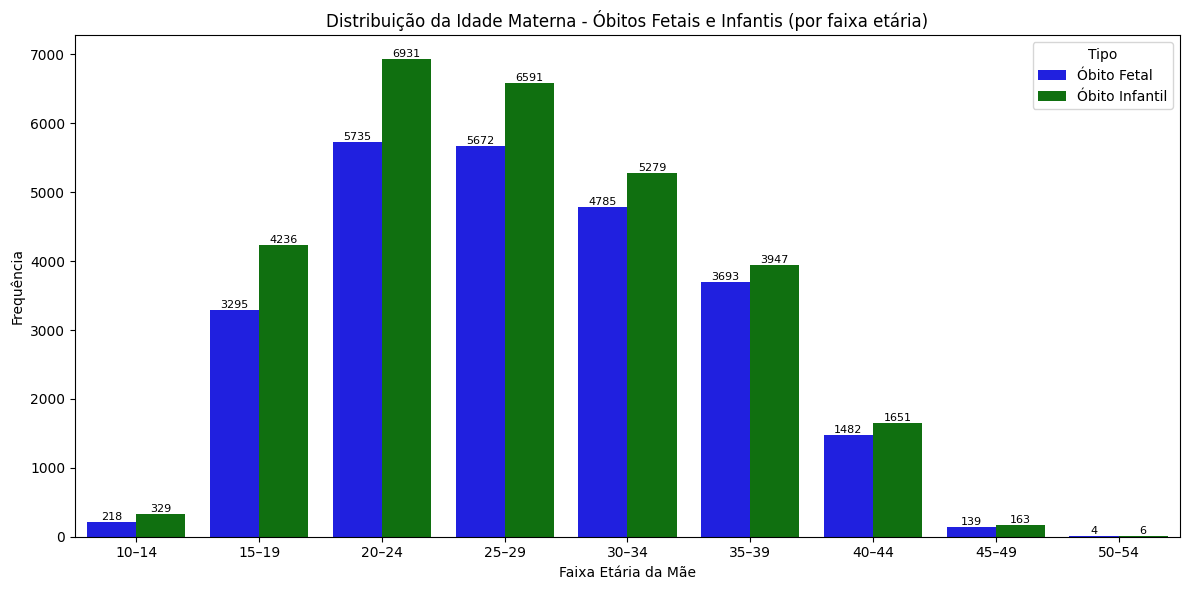

In [ ]:
# Substituir 99 por NaN
df_dofet23_filtrado['IDADEMAE'] = df_dofet23_filtrado['IDADEMAE'].replace(99, np.nan)
df_doinf23_filtrado['IDADEMAE'] = df_doinf23_filtrado['IDADEMAE'].replace(99, np.nan)

# Criar DataFrame combinado
df_fetais = df_dofet23_filtrado[['IDADEMAE']].dropna().copy()
df_fetais['Tipo'] = 'Óbito Fetal'

df_infantis = df_doinf23_filtrado[['IDADEMAE']].dropna().copy()
df_infantis['Tipo'] = 'Óbito Infantil'

df_combinado = pd.concat([df_fetais, df_infantis], ignore_index=True)

# Criar faixas etárias
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
labels = ['10–14', '15–19', '20–24', '25–29', '30–34', '35–39', '40–44', '45–49', '50–54']
df_combinado['FaixaEtaria'] = pd.cut(df_combinado['IDADEMAE'], bins=bins, labels=labels, right=False)

# Plot com faixas etárias
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_combinado,
    x='FaixaEtaria',
    hue='Tipo',
    palette={'Óbito Fetal': 'blue', 'Óbito Infantil': 'green'}
)

# Adicionar valores acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.title('Distribuição da Idade Materna - Óbitos Fetais e Infantis (por faixa etária)')
plt.xlabel('Faixa Etária da Mãe')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-1299105925.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dofet23_filtrado['IDADEMAE'] = df_dofet23_filtrado['IDADEMAE'].replace(99, np.nan)
/tmp/ipython-input-11-1299105925.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doinf23_filtrado['IDADEMAE'] = df_doinf23_filtrado['IDADEMAE'].replace(99, np.nan)


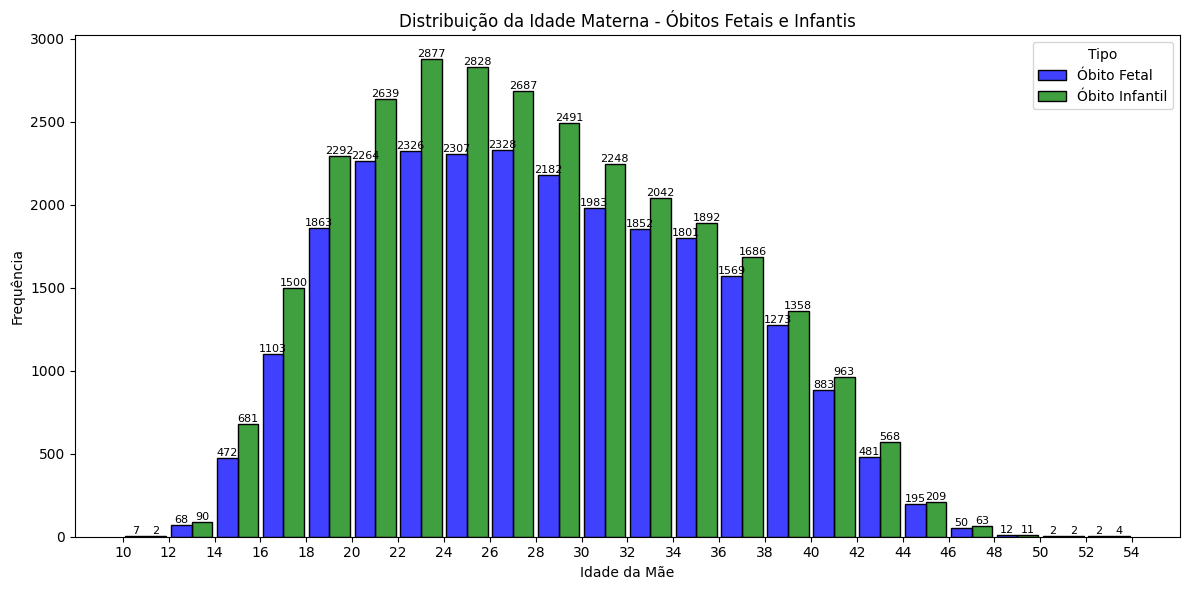

In [ ]:
# Substituir 99 por NaN na coluna IDADEMAE
df_dofet23_filtrado['IDADEMAE'] = df_dofet23_filtrado['IDADEMAE'].replace(99, np.nan)
df_doinf23_filtrado['IDADEMAE'] = df_doinf23_filtrado['IDADEMAE'].replace(99, np.nan)

# Criar DataFrame combinado
df_fetais = df_dofet23_filtrado[['IDADEMAE']].dropna().copy()
df_fetais['Tipo'] = 'Óbito Fetal'

df_infantis = df_doinf23_filtrado[['IDADEMAE']].dropna().copy()
df_infantis['Tipo'] = 'Óbito Infantil'

df_combinado = pd.concat([df_fetais, df_infantis], ignore_index=True)

# Plot com segmentação melhor do eixo X
plt.figure(figsize=(12, 6))
ax = sns.histplot(
    data=df_combinado,
    x='IDADEMAE',
    hue='Tipo',
    bins=range(10, 55, 2),  # Intervalos de 2 anos, de 10 até 54
    multiple='dodge',
    shrink=0.9,
    palette={'Óbito Fetal': 'blue', 'Óbito Infantil': 'green'}
)

# Ajustar ticks do eixo X
plt.xticks(ticks=range(10, 55, 2))

# Adicionar valores acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.title('Distribuição da Idade Materna - Óbitos Fetais e Infantis')
plt.xlabel('Idade da Mãe')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


/tmp/ipython-input-14-3760865183.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dofet23_filtrado['IDADEMAE'] = df_dofet23_filtrado['IDADEMAE'].replace(99, np.nan)
/tmp/ipython-input-14-3760865183.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doinf23_filtrado['IDADEMAE'] = df_doinf23_filtrado['IDADEMAE'].replace(99, np.nan)


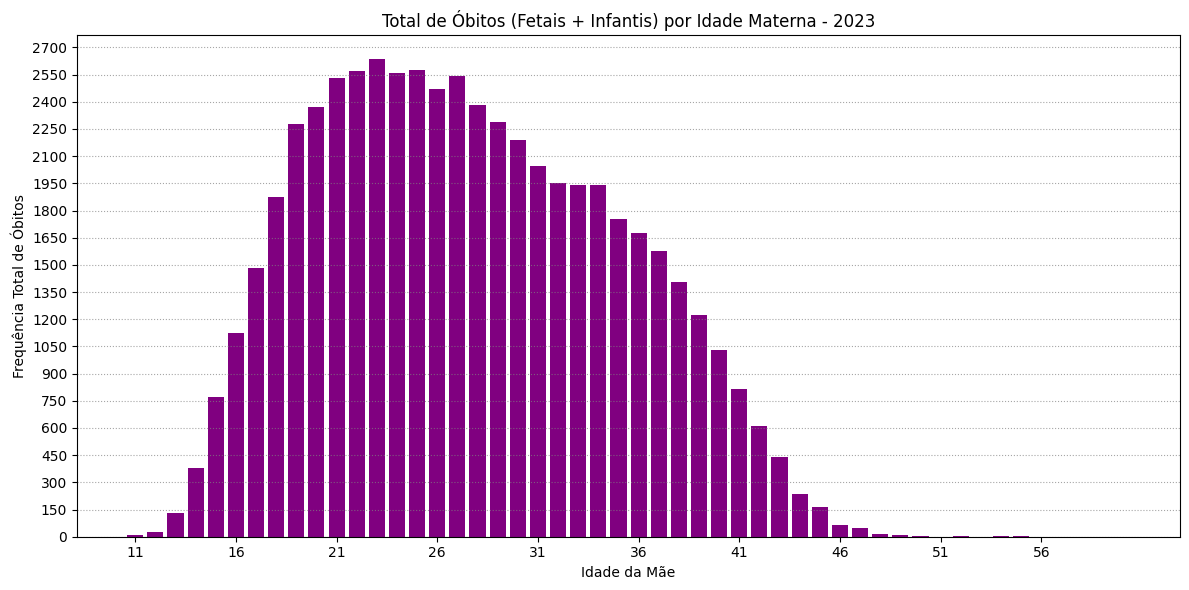

In [ ]:
# Substituir 99 por NaN
df_dofet23_filtrado['IDADEMAE'] = df_dofet23_filtrado['IDADEMAE'].replace(99, np.nan)
df_doinf23_filtrado['IDADEMAE'] = df_doinf23_filtrado['IDADEMAE'].replace(99, np.nan)

# Unir os dois DataFrames e remover NaNs
df_total = pd.concat([
    df_dofet23_filtrado[['IDADEMAE']],
    df_doinf23_filtrado[['IDADEMAE']]
], ignore_index=True).dropna()

# Arredondar idade para inteiros e contar
df_total['IDADEMAE'] = df_total['IDADEMAE'].astype(int)
contagem_total = df_total['IDADEMAE'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(contagem_total.index, contagem_total.values, color='purple')

# Adicionar grid no eixo Y
plt.grid(axis='y', linestyle='dotted', linewidth=0.8, color='gray', alpha=0.7)

# Melhor segmentação do eixo X (ex: de 5 em 5 anos)
plt.xticks(ticks=np.arange(min(contagem_total.index), max(contagem_total.index)+1, 5))

# Melhor segmentação do eixo Y (automático ou manual)
max_y = max(contagem_total.values)
plt.yticks(np.arange(0, max_y + 150, 150))  # de 50 em 50, ajuste conforme necessário

plt.title('Total de Óbitos (Fetais + Infantis) por Idade Materna - 2023')
plt.xlabel('Idade da Mãe')
plt.ylabel('Frequência Total de Óbitos')
plt.tight_layout()
plt.show()


# 3.3

Peso ao Nascer

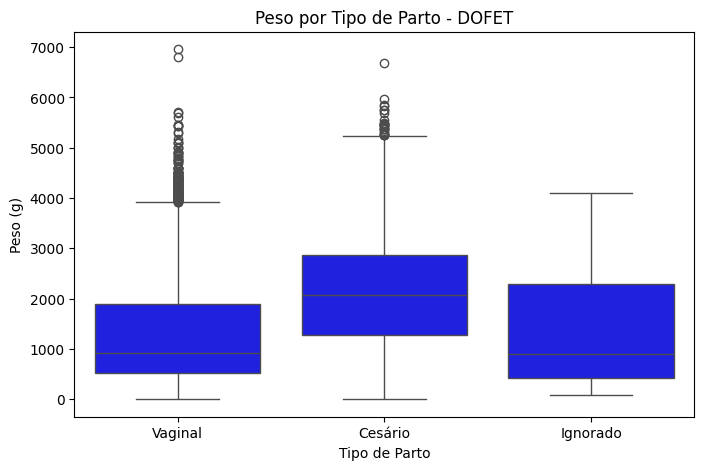

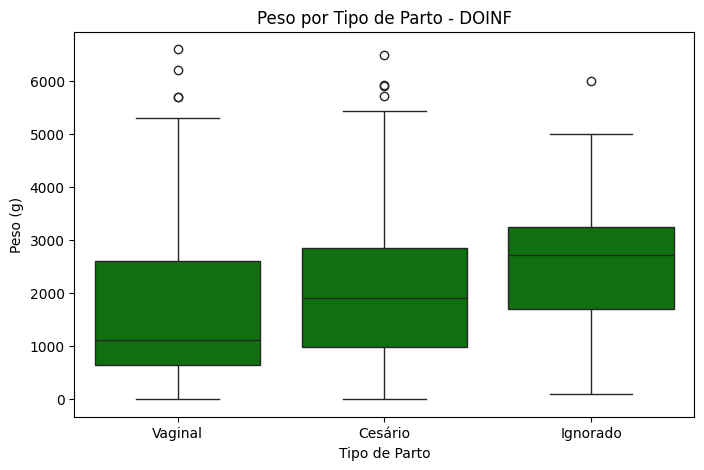

In [ ]:
# Boxplot do peso por tipo de parto
plt.figure(figsize=(8, 5))
sns.boxplot(x='PARTO', y='PESO', data=df_dofet23_filtrado, color='blue')
plt.title('Peso por Tipo de Parto - DOFET')
plt.xlabel('Tipo de Parto')
plt.xticks([0,1,2], ['Vaginal', 'Cesário', 'Ignorado'])
plt.ylabel('Peso (g)')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='PARTO', y='PESO', data=df_doinf23_filtrado, color='green')
plt.title('Peso por Tipo de Parto - DOINF')
plt.xlabel('Tipo de Parto')
plt.xticks([0,1,2], ['Vaginal', 'Cesário', 'Ignorado'])
plt.ylabel('Peso (g)')
plt.show()

In [ ]:
# Para df_dofet23_filtrado
n_dofet_parto = df_dofet23_filtrado.groupby('PARTO').size().reset_index(name='n')
print("Número de observações por tipo de parto (DOFET):")
print(n_dofet_parto)

# Para df_doinf23_filtrado
n_doinf_parto = df_doinf23_filtrado.groupby('PARTO').size().reset_index(name='n')
print("\nNúmero de observações por tipo de parto (DOINF):")
print(n_doinf_parto)

Número de observações por tipo de parto (DOFET):
   PARTO      n
0    1.0  17567
1    2.0   8212
2    9.0    152

Número de observações por tipo de parto (DOINF):
   PARTO      n
0    1.0  13727
1    2.0  15625
2    9.0    425


In [ ]:
# Para df_dofet23_filtrado
median_dofet_parto = df_dofet23_filtrado.groupby('PARTO')['PESO'].median().reset_index()
print("\nMediana do peso por tipo de parto (DOFET):")
print(median_dofet_parto)

# Para df_doinf23_filtrado
median_doinf_parto = df_doinf23_filtrado.groupby('PARTO')['PESO'].median().reset_index()
print("\nMediana do peso por tipo de parto (DOINF):")
print(median_doinf_parto)


Mediana do peso por tipo de parto (DOFET):
   PARTO    PESO
0    1.0   920.0
1    2.0  2076.5
2    9.0   897.5

Mediana do peso por tipo de parto (DOINF):
   PARTO    PESO
0    1.0  1125.0
1    2.0  1915.0
2    9.0  2720.0


# 3.4

Idade Gestacional

/tmp/ipython-input-18-1184899210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dofet23_filtrado['SEMAGESTAC'] = df_dofet23_filtrado['SEMAGESTAC'].replace(99, np.nan)
/tmp/ipython-input-18-1184899210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doinf23_filtrado['SEMAGESTAC'] = df_doinf23_filtrado['SEMAGESTAC'].replace(99, np.nan)


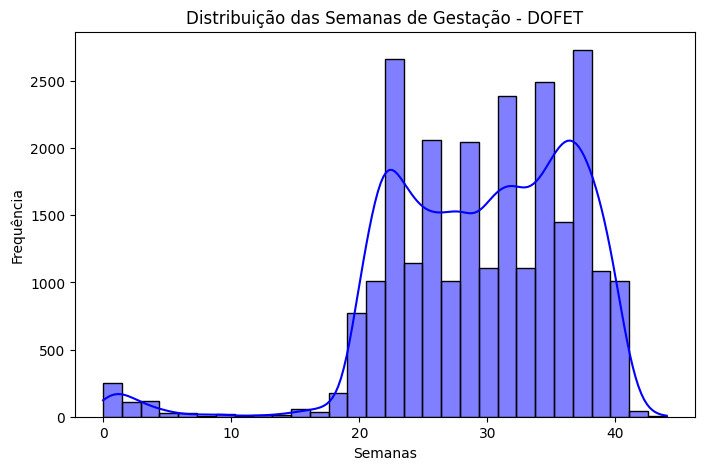

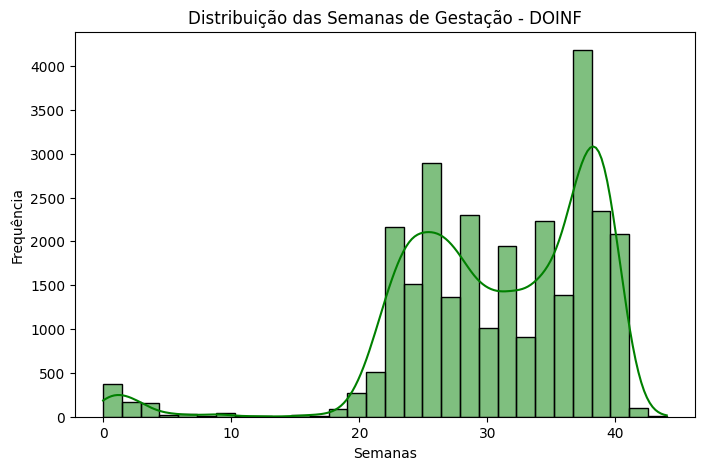

In [ ]:
# Histograma das semanas de gestação - substituir 99 por NaN
df_dofet23_filtrado['SEMAGESTAC'] = df_dofet23_filtrado['SEMAGESTAC'].replace(99, np.nan)
df_doinf23_filtrado['SEMAGESTAC'] = df_doinf23_filtrado['SEMAGESTAC'].replace(99, np.nan)

plt.figure(figsize=(8, 5))
sns.histplot(df_dofet23_filtrado['SEMAGESTAC'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribuição das Semanas de Gestação - DOFET')
plt.xlabel('Semanas')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_doinf23_filtrado['SEMAGESTAC'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribuição das Semanas de Gestação - DOINF')
plt.xlabel('Semanas')
plt.ylabel('Frequência')
plt.show()

/tmp/ipython-input-19-3695266506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dofet23_filtrado['SEMAGESTAC'] = df_dofet23_filtrado['SEMAGESTAC'].replace(99, np.nan)
/tmp/ipython-input-19-3695266506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doinf23_filtrado['SEMAGESTAC'] = df_doinf23_filtrado['SEMAGESTAC'].replace(99, np.nan)


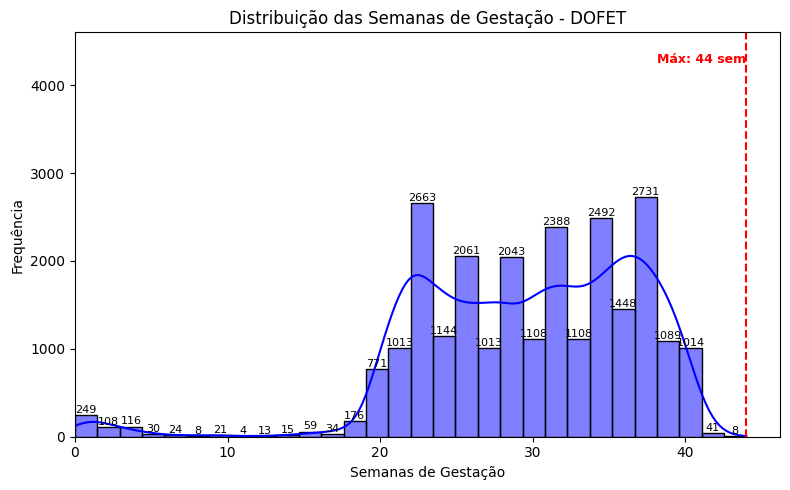

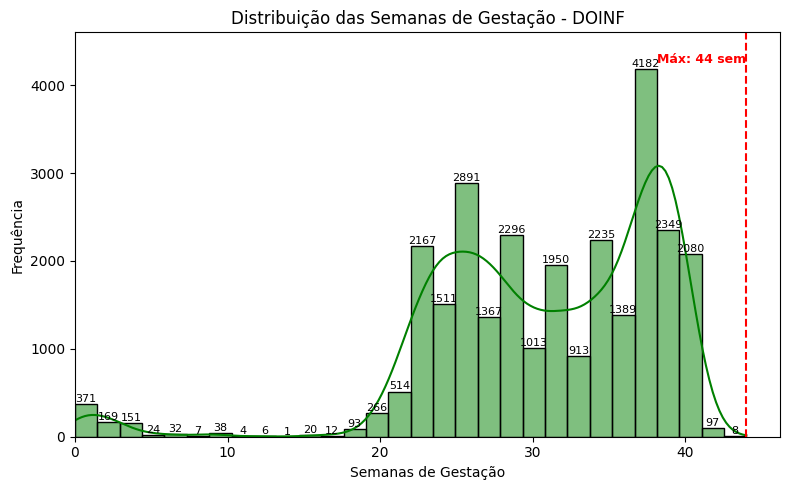

In [ ]:
# Substituir 99 por NaN
df_dofet23_filtrado['SEMAGESTAC'] = df_dofet23_filtrado['SEMAGESTAC'].replace(99, np.nan)
df_doinf23_filtrado['SEMAGESTAC'] = df_doinf23_filtrado['SEMAGESTAC'].replace(99, np.nan)

# Determinar o limite superior comum para o eixo Y
freqs_dofet, _ = np.histogram(df_dofet23_filtrado['SEMAGESTAC'].dropna(), bins=30)
freqs_doinf, _ = np.histogram(df_doinf23_filtrado['SEMAGESTAC'].dropna(), bins=30)
y_max = max(freqs_dofet.max(), freqs_doinf.max()) * 1.1  # 10% de margem

# Função para plotar com valores nas barras e destaque do valor máximo
def plot_histograma_semanas(dados, cor, titulo):
    plt.figure(figsize=(8, 5))
    ax = sns.histplot(dados.dropna(), bins=30, kde=True, color=cor)

    # Adicionar valores nas barras
    for p in ax.patches:
        altura = p.get_height()
        if altura > 0:
            ax.text(p.get_x() + p.get_width() / 2,
                    altura + 0.5,
                    f'{int(altura)}',
                    ha='center', va='bottom', fontsize=8)

    # Marcar semana máxima observada
    semana_max = int(dados.dropna().max())
    ax.axvline(x=semana_max, color='red', linestyle='--', linewidth=1.5)
    ax.text(semana_max, y_max * 0.95, f'Máx: {semana_max} sem',
            color='red', ha='right', va='top', fontsize=9, fontweight='bold')

    # Ajustes estéticos
    ax.set_title(titulo)
    ax.set_xlabel('Semanas de Gestação')
    ax.set_ylabel('Frequência')
    ax.set_ylim(0, y_max)
    ax.set_xlim(0)  # Garante que o eixo X começa no zero
    plt.tight_layout()
    plt.show()

# Plot para DOFET
plot_histograma_semanas(df_dofet23_filtrado['SEMAGESTAC'], 'blue', 'Distribuição das Semanas de Gestação - DOFET')

# Plot para DOINF
plot_histograma_semanas(df_doinf23_filtrado['SEMAGESTAC'], 'green', 'Distribuição das Semanas de Gestação - DOINF')


/tmp/ipython-input-20-3122901493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dofet23_filtrado['SEMAGESTAC'] = df_dofet23_filtrado['SEMAGESTAC'].replace(99, np.nan)
/tmp/ipython-input-20-3122901493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doinf23_filtrado['SEMAGESTAC'] = df_doinf23_filtrado['SEMAGESTAC'].replace(99, np.nan)


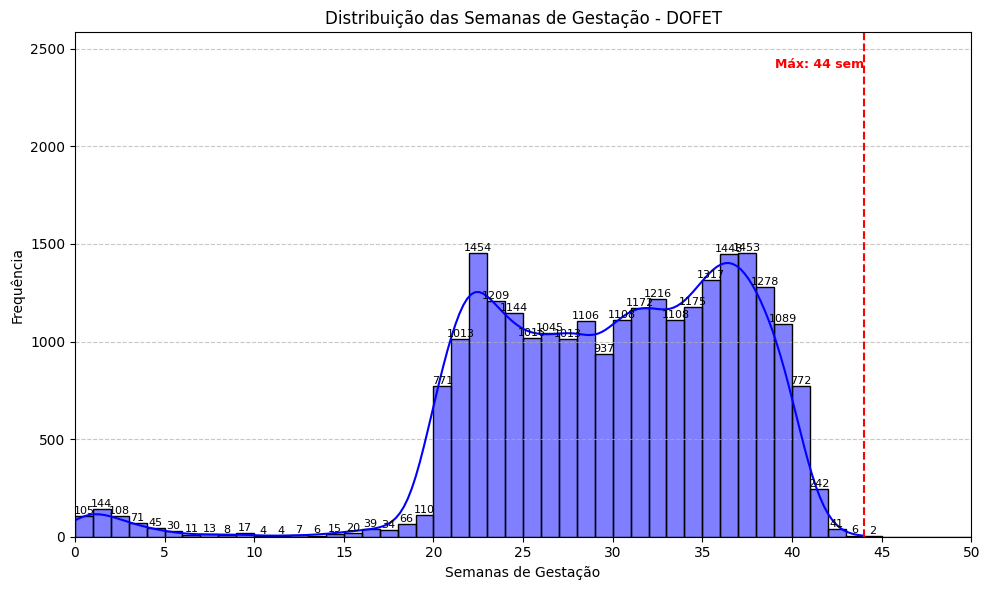

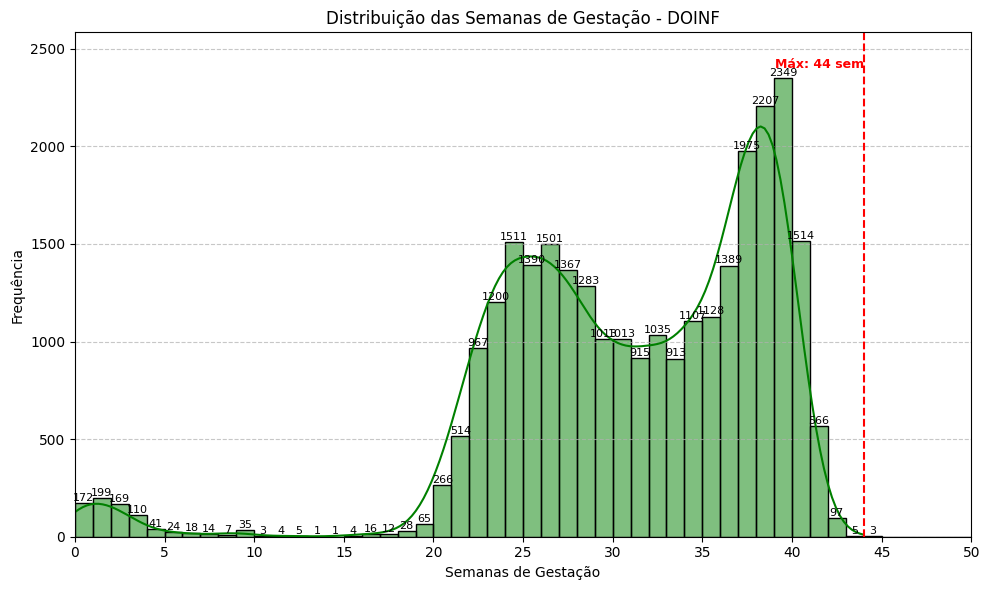

In [ ]:
# Substituir 99 por NaN
df_dofet23_filtrado['SEMAGESTAC'] = df_dofet23_filtrado['SEMAGESTAC'].replace(99, np.nan)
df_doinf23_filtrado['SEMAGESTAC'] = df_doinf23_filtrado['SEMAGESTAC'].replace(99, np.nan)

# Determinar o limite superior comum para o eixo Y
freqs_dofet, _ = np.histogram(df_dofet23_filtrado['SEMAGESTAC'].dropna(), bins=range(0, 51)) # Use integer range for bins
freqs_doinf, _ = np.histogram(df_doinf23_filtrado['SEMAGESTAC'].dropna(), bins=range(0, 51)) # Use integer range for bins
y_max = max(freqs_dofet.max(), freqs_doinf.max()) * 1.1  # 10% de margem

# Função para plotar com valores nas barras e destaque do valor máximo
def plot_histograma_semanas(dados, cor, titulo):
    plt.figure(figsize=(10, 6)) # Increased figure size
    ax = sns.histplot(dados.dropna(), bins=range(0, 51), kde=True, color=cor) # Use integer range for bins

    # Adicionar valores nas barras
    for p in ax.patches:
        altura = p.get_height()
        if altura > 0:
            ax.text(p.get_x() + p.get_width() / 2,
                    altura + 0.5,
                    f'{int(altura)}',
                    ha='center', va='bottom', fontsize=8)

    # Marcar semana máxima observada
    if not dados.dropna().empty: # Check if there are non-NaN values
        semana_max = int(dados.dropna().max())
        ax.axvline(x=semana_max, color='red', linestyle='--', linewidth=1.5)
        ax.text(semana_max, y_max * 0.95, f'Máx: {semana_max} sem',
                color='red', ha='right', va='top', fontsize=9, fontweight='bold')
    else:
         semana_max = "N/A"


    # Ajustes estéticos
    ax.set_title(titulo)
    ax.set_xlabel('Semanas de Gestação')
    ax.set_ylabel('Frequência')
    ax.set_ylim(0, y_max)
    ax.set_xlim(0, 50)  # Explicitly set x-axis limit from 0 to 50 (or slightly above max possible week)
    plt.xticks(np.arange(0, 51, 5)) # Set x-axis ticks at intervals of 5
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
    plt.tight_layout()
    plt.show()

# Plot para DOFET
plot_histograma_semanas(df_dofet23_filtrado['SEMAGESTAC'], 'blue', 'Distribuição das Semanas de Gestação - DOFET')

# Plot para DOINF
plot_histograma_semanas(df_doinf23_filtrado['SEMAGESTAC'], 'green', 'Distribuição das Semanas de Gestação - DOINF')


# 3.5

Tipo de parto

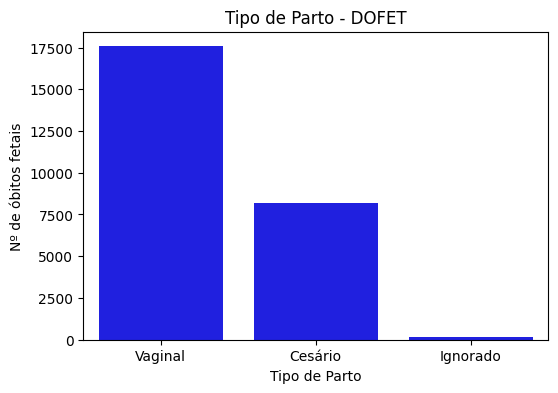

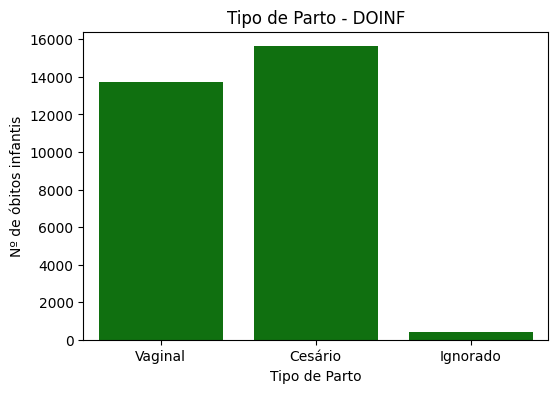

In [ ]:
# Tipo de parto X óbitos
plt.figure(figsize=(6, 4))
sns.countplot(data=df_dofet23_filtrado, x='PARTO', color='blue')
plt.title('Tipo de Parto - DOFET')
plt.xlabel('Tipo de Parto')
plt.xticks([0,1,2], ['Vaginal', 'Cesário', 'Ignorado'])
plt.ylabel('Nº de óbitos fetais')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_doinf23_filtrado, x='PARTO', color='green')
plt.title('Tipo de Parto - DOINF')
plt.xlabel('Tipo de Parto')
plt.xticks([0,1,2], ['Vaginal', 'Cesário', 'Ignorado'])
plt.ylabel('Nº de óbitos infantis')
plt.show()

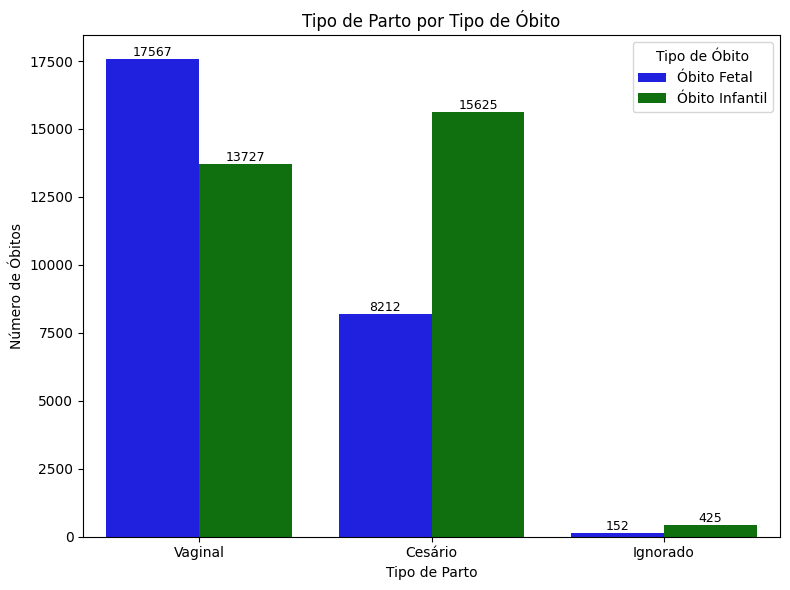

In [ ]:
# Combinar os dados de parto para ambos os tipos de óbito em um único DataFrame para plotagem
# Criar uma cópia para evitar SettingWithCopyWarning
df_parto_fetal = df_dofet23_filtrado[['PARTO']].copy()
df_parto_fetal['Tipo'] = 'Óbito Fetal'

df_parto_infantil = df_doinf23_filtrado[['PARTO']].copy()
df_parto_infantil['Tipo'] = 'Óbito Infantil'

df_parto_combinado = pd.concat([df_parto_fetal, df_parto_infantil], ignore_index=True)

# Contar a frequência para cada tipo de parto por tipo de óbito
contagem_parto = df_parto_combinado.groupby(['PARTO', 'Tipo']).size().reset_index(name='Contagem')

# Criar o plot de barras agrupadas
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=contagem_parto,
    x='PARTO',
    y='Contagem',
    hue='Tipo',
    palette={'Óbito Fetal': 'blue', 'Óbito Infantil': 'green'}
)

# Adicionar os rótulos dos tipos de parto no eixo X
plt.xticks([0, 1, 2], ['Vaginal', 'Cesário', 'Ignorado'])

# Adicionar título e rótulos dos eixos
plt.title('Tipo de Parto por Tipo de Óbito')
plt.xlabel('Tipo de Parto')
plt.ylabel('Número de Óbitos')

# Adicionar os valores em cima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.legend(title='Tipo de Óbito')
plt.tight_layout()
plt.show()


# 3.6

Escolaridade da Mãe

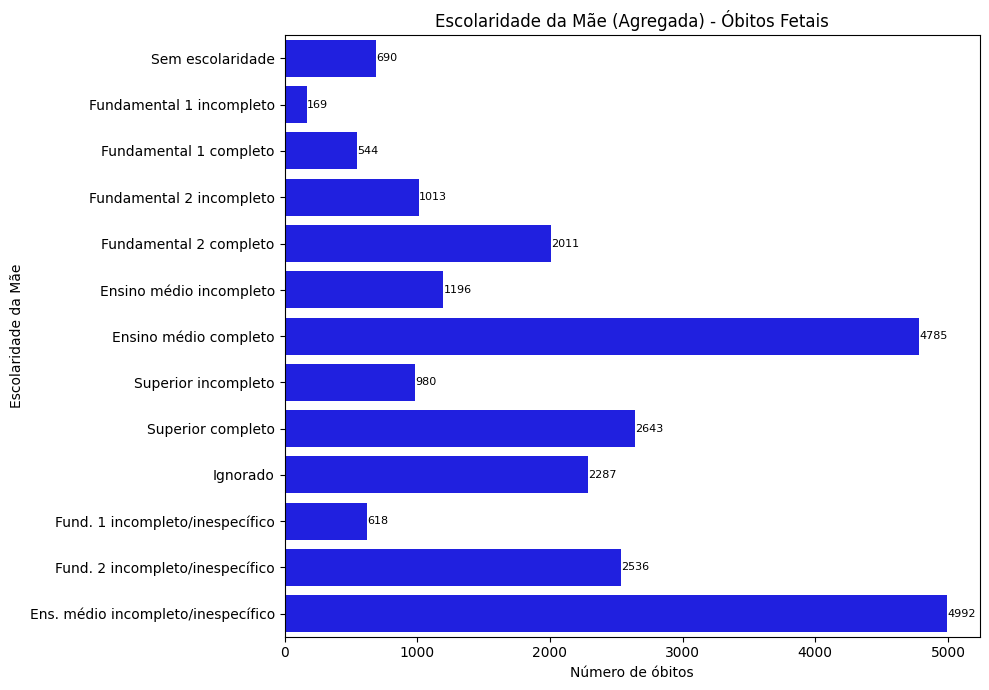

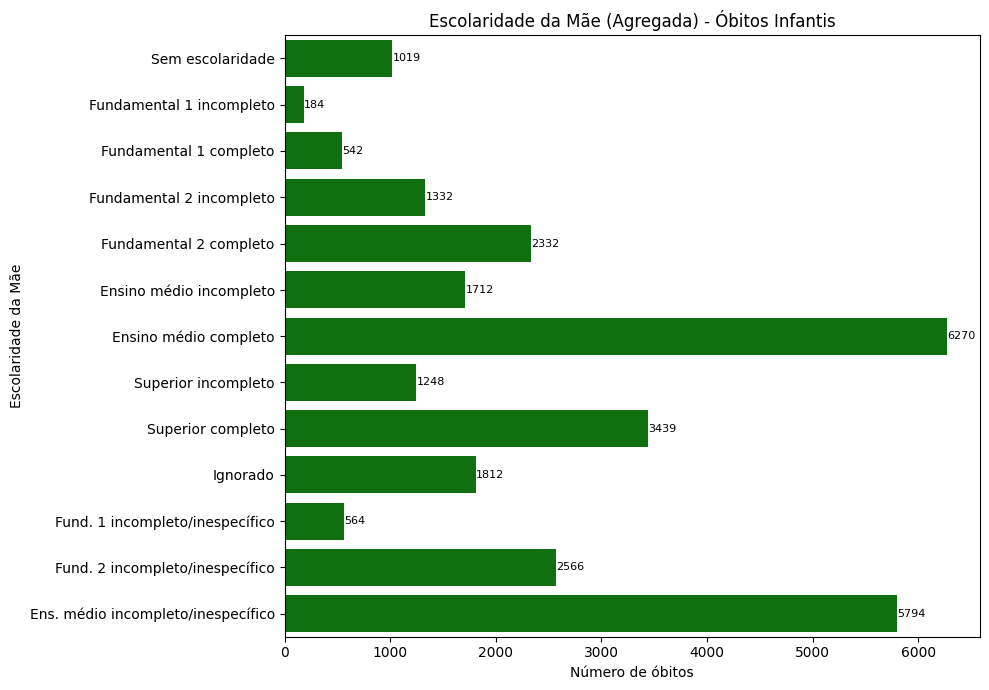

In [ ]:
# Lista dos rótulos (em ordem de código 0 a 12)
labels = [
    'Sem escolaridade',
    'Fundamental 1 incompleto',
    'Fundamental 1 completo',
    'Fundamental 2 incompleto',
    'Fundamental 2 completo',
    'Ensino médio incompleto',
    'Ensino médio completo',
    'Superior incompleto',
    'Superior completo',
    'Ignorado',
    'Fund. 1 incompleto/inespecífico',
    'Fund. 2 incompleto/inespecífico',
    'Ens. médio incompleto/inespecífico'
]

# Função para criar gráfico horizontal com valores
def plot_escolaridade_horizontal(df, titulo, cor, ylabel):
    plt.figure(figsize=(10, 7))

    # Conta os valores de 0 a 12 e preenche ausentes com 0
    contagem = df['ESCMAEAGR1'].value_counts().reindex(range(13), fill_value=0)

    ax = sns.barplot(
        y=contagem.index,
        x=contagem.values,
        orient='h',
        color=cor
    )

    # Adicionar valores ao lado das barras
    for i, valor in enumerate(contagem.values):
        ax.text(valor + 2, i, str(valor), va='center', fontsize=8)

    ax.set_title(titulo)
    ax.set_xlabel('Número de óbitos')
    ax.set_ylabel(ylabel)
    ax.set_yticks(range(13))
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.show()

# DOFET
plot_escolaridade_horizontal(
    df_dofet23_filtrado,
    'Escolaridade da Mãe (Agregada) - Óbitos Fetais',
    'blue',
    'Escolaridade da Mãe'
)

# DOINF
plot_escolaridade_horizontal(
    df_doinf23_filtrado,
    'Escolaridade da Mãe (Agregada) - Óbitos Infantis',
    'green',
    'Escolaridade da Mãe'
)


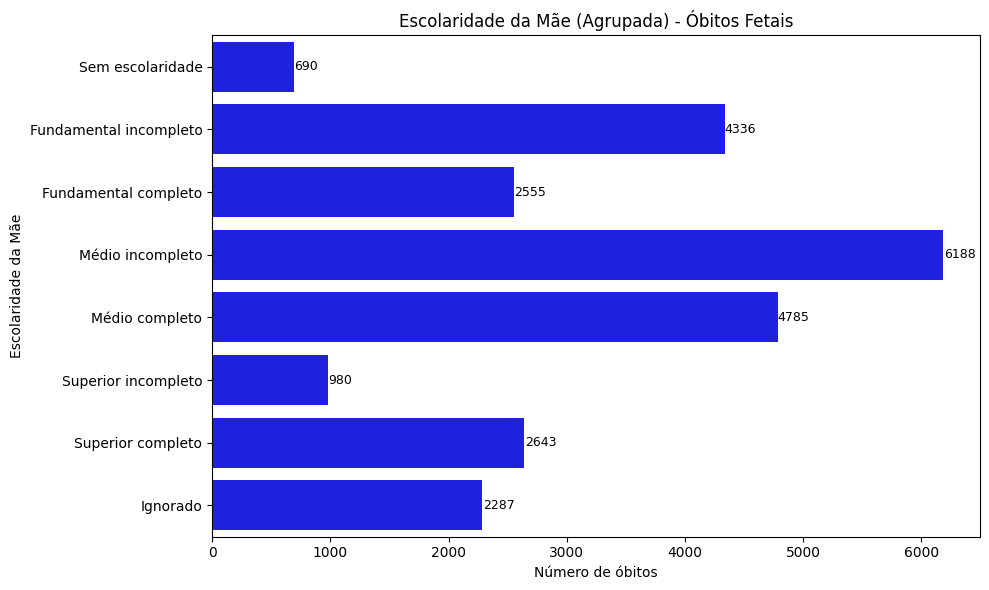

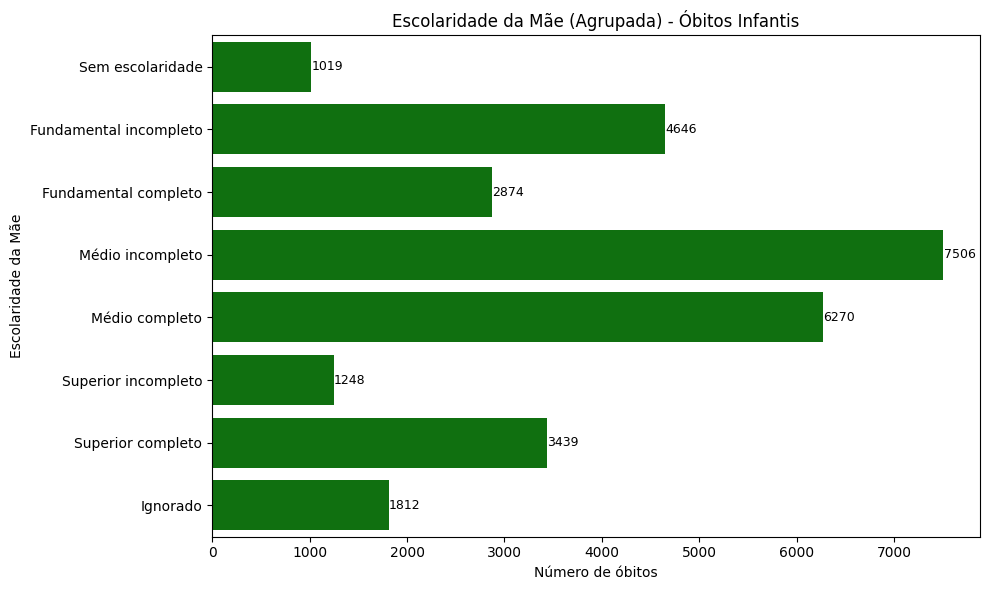

In [ ]:
# Mapeamento para nova categoria
mapa_escolaridade = {
    0: 'Sem escolaridade',
    1: 'Fundamental incompleto',
    2: 'Fundamental completo',
    3: 'Fundamental incompleto',
    4: 'Fundamental completo',
    5: 'Médio incompleto',
    6: 'Médio completo',
    7: 'Superior incompleto',
    8: 'Superior completo',
    9: 'Ignorado',
    10: 'Fundamental incompleto',
    11: 'Fundamental incompleto',  # opcional: pode ser descartado se não usado
    12: 'Médio incompleto'
}

# Função para agrupar e plotar
def plot_escolaridade_agrupada(df, titulo, cor, ylabel):
    plt.figure(figsize=(10, 6))

    # Aplicar mapeamento
    df_temp = df['ESCMAEAGR1'].map(mapa_escolaridade)

    # Contagem por categoria agrupada
    contagem = df_temp.value_counts().reindex([
        'Sem escolaridade',
        'Fundamental incompleto',
        'Fundamental completo',
        'Médio incompleto',
        'Médio completo',
        'Superior incompleto',
        'Superior completo',
        'Ignorado'
    ], fill_value=0)

    ax = sns.barplot(
        y=contagem.index,
        x=contagem.values,
        orient='h',
        color=cor
    )

    # Adicionar valores
    for i, valor in enumerate(contagem.values):
        ax.text(valor + 2, i, str(valor), va='center', fontsize=9)

    ax.set_title(titulo)
    ax.set_xlabel('Número de óbitos')
    ax.set_ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# DOFET
plot_escolaridade_agrupada(
    df_dofet23_filtrado,
    'Escolaridade da Mãe (Agrupada) - Óbitos Fetais',
    'blue',
    'Escolaridade da Mãe'
)

# DOINF
plot_escolaridade_agrupada(
    df_doinf23_filtrado,
    'Escolaridade da Mãe (Agrupada) - Óbitos Infantis',
    'green',
    'Escolaridade da Mãe'
)


# 3.7

Assistência Médica

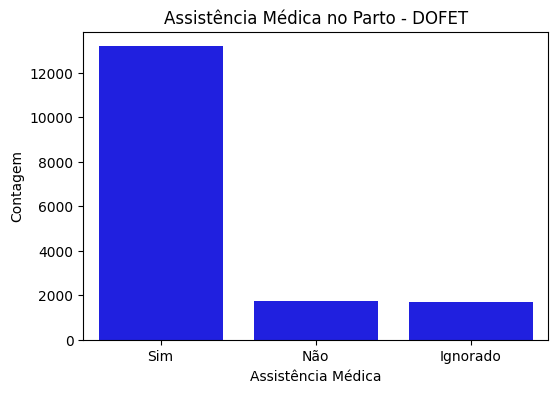

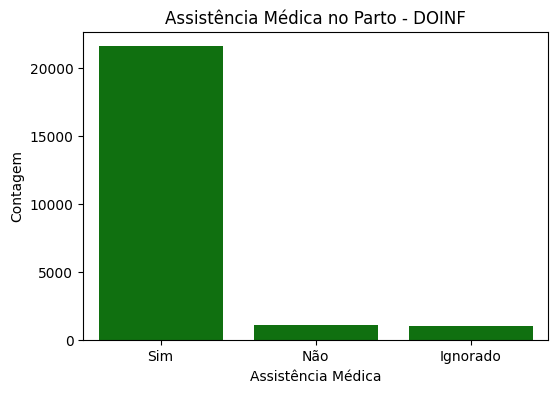

In [ ]:
# Assistência médica
plt.figure(figsize=(6, 4))
sns.countplot(data=df_dofet23_filtrado, x='ASSISTMED', color='blue')
plt.title('Assistência Médica no Parto - DOFET')
plt.xlabel('Assistência Médica')
plt.xticks([0,1,2], ['Sim', 'Não','Ignorado'])
plt.ylabel('Contagem')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_doinf23_filtrado, x='ASSISTMED', color='green')
plt.title('Assistência Médica no Parto - DOINF')
plt.xlabel('Assistência Médica')
plt.xticks([0,1,2], ['Sim', 'Não','Ignorado'])
plt.ylabel('Contagem')
plt.show()

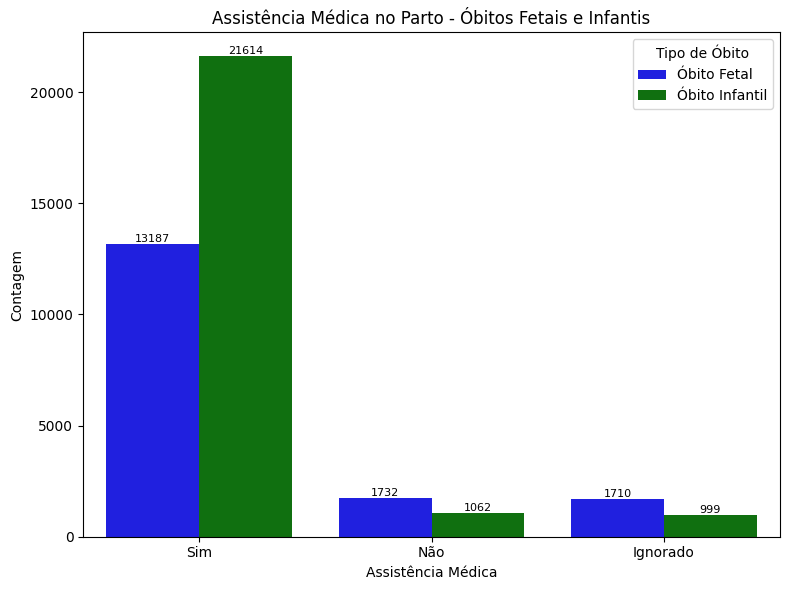

In [ ]:
# Combinar os dataframes para plotagem
df_fetal_assistmed = df_dofet23_filtrado[['ASSISTMED']].copy()
df_fetal_assistmed['Tipo'] = 'Óbito Fetal'

df_infantil_assistmed = df_doinf23_filtrado[['ASSISTMED']].copy()
df_infantil_assistmed['Tipo'] = 'Óbito Infantil'

df_assistmed_combinado = pd.concat([df_fetal_assistmed, df_infantil_assistmed], ignore_index=True)

# Plot combinado com barras lado a lado
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_assistmed_combinado, x='ASSISTMED', hue='Tipo', palette={'Óbito Fetal': 'blue', 'Óbito Infantil': 'green'})
plt.title('Assistência Médica no Parto - Óbitos Fetais e Infantis')
plt.xlabel('Assistência Médica')
plt.xticks([0, 1, 2], ['Sim', 'Não', 'Ignorado'])
plt.ylabel('Contagem')

# Adicionar valores acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.legend(title='Tipo de Óbito')
plt.tight_layout()
plt.show()

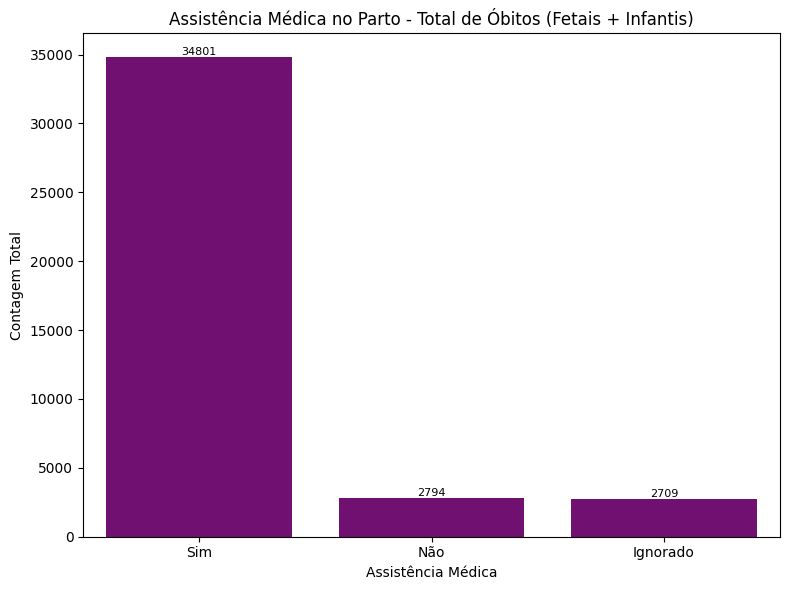

In [ ]:
# Combinar os dataframes para plotagem e somar os valores
df_assistmed_dofet_counts = df_dofet23_filtrado['ASSISTMED'].value_counts().reset_index()
df_assistmed_dofet_counts.columns = ['ASSISTMED', 'Count']
df_assistmed_dofet_counts['Tipo'] = 'Óbito Fetal'

df_assistmed_doinf_counts = df_doinf23_filtrado['ASSISTMED'].value_counts().reset_index()
df_assistmed_doinf_counts.columns = ['ASSISTMED', 'Count']
df_assistmed_doinf_counts['Tipo'] = 'Óbito Infantil'

# Combinar as contagens
df_assistmed_combined_counts = pd.concat([df_assistmed_dofet_counts, df_assistmed_doinf_counts], ignore_index=True)

# Agrupar por ASSISTMED e somar as contagens
df_assistmed_total = df_assistmed_combined_counts.groupby('ASSISTMED')['Count'].sum().reset_index()

# Plot do total somado
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_assistmed_total, x='ASSISTMED', y='Count', color='purple')
plt.title('Assistência Médica no Parto - Total de Óbitos (Fetais + Infantis)')
plt.xlabel('Assistência Médica')
plt.xticks([0, 1, 2], ['Sim', 'Não', 'Ignorado'])
plt.ylabel('Contagem Total')

# Adicionar valores acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


# 3.8

Raça/Cor

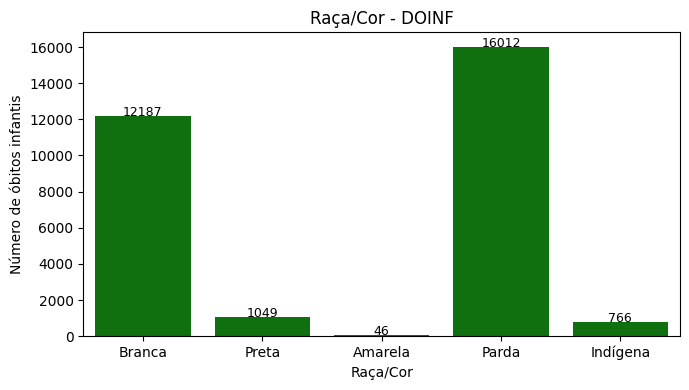

In [ ]:
# Gráfico de Raça/Cor com valores acima das barras
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=df_doinf23_filtrado, x='RACACOR', color='green')

# Título e eixos
plt.title('Raça/Cor - DOINF')
plt.xlabel('Raça/Cor')
plt.xticks([0,1,2,3,4], ['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena'])
plt.ylabel('Número de óbitos infantis')

# Adicionar valores acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 1,  # pequeno deslocamento acima da barra
            str(int(height)),
            ha='center',
            fontsize=9
        )

plt.tight_layout()
plt.show()


Sexo

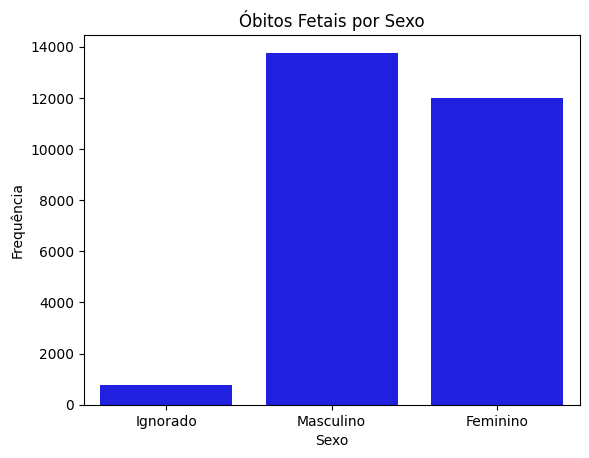

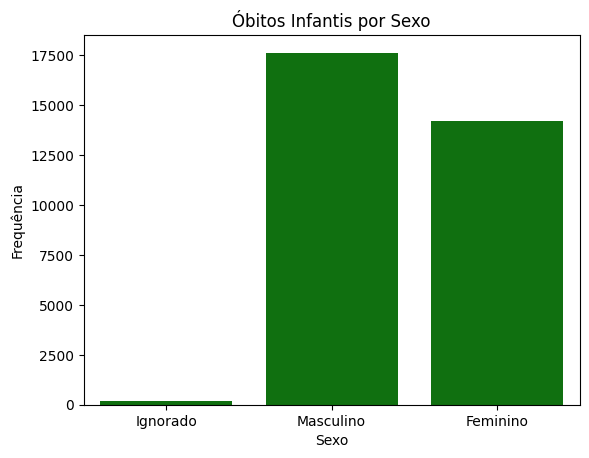

In [ ]:
# Sexo x óbitos
sns.countplot(data=df_dofet23_filtrado, x='SEXO', color='blue')
plt.title('Óbitos Fetais por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.xticks([0, 1, 2], ['Ignorado','Masculino', 'Feminino'])
plt.show()

sns.countplot(data=df_doinf23_filtrado, x='SEXO', color='green')
plt.title('Óbitos Infantis por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.xticks([0, 1, 2], ['Ignorado','Masculino', 'Feminino'])
plt.show()

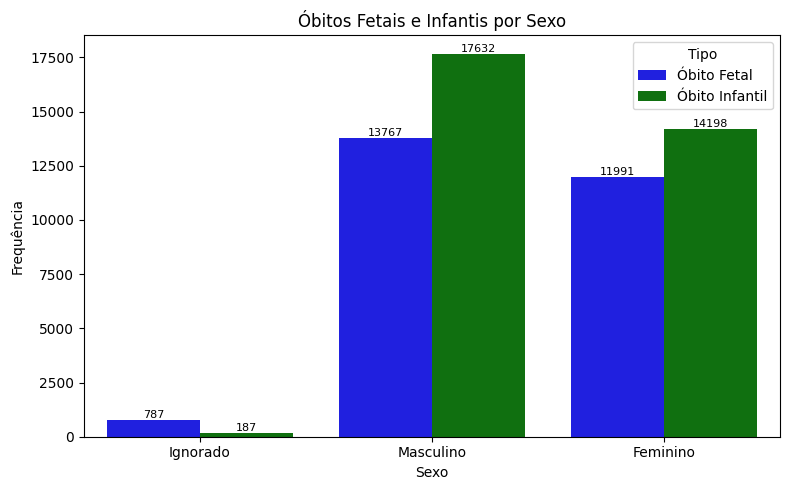

In [ ]:
# Criar um DataFrame combinado para plotagem
df_sexo_fetal = df_dofet23_filtrado[['SEXO']].dropna().copy()
df_sexo_fetal['Tipo'] = 'Óbito Fetal'

df_sexo_infantil = df_doinf23_filtrado[['SEXO']].dropna().copy()
df_sexo_infantil['Tipo'] = 'Óbito Infantil'

df_sexo_combinado = pd.concat([df_sexo_fetal, df_sexo_infantil], ignore_index=True)

# Mapeamento para os rótulos do eixo X
sexo_labels = {
    0: 'Ignorado',
    1: 'Masculino',
    2: 'Feminino'
}

# Substituir os códigos pelos rótulos para melhor visualização no plot
df_sexo_combinado['SEXO_label'] = df_sexo_combinado['SEXO'].map(sexo_labels)

# Plot combinado com barras lado a lado
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df_sexo_combinado,
    x='SEXO_label',
    hue='Tipo',
    palette={'Óbito Fetal': 'blue', 'Óbito Infantil': 'green'},
    order=[sexo_labels[k] for k in sorted(sexo_labels.keys()) if k in df_sexo_combinado['SEXO'].unique()]
)

# Adicionar valores acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.title('Óbitos Fetais e Infantis por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()


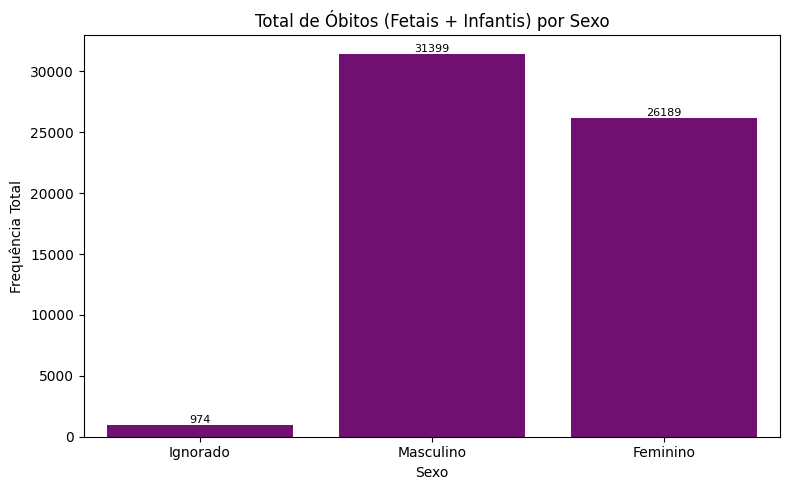

In [ ]:
# Agrupar por sexo e somar as contagens para óbitos fetais e infantis
df_sexo_total = df_sexo_combinado.groupby('SEXO_label')['Tipo'].count().reset_index(name='Total de Óbitos')

# Plot com as barras somadas
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df_sexo_total,
    x='SEXO_label',
    y='Total de Óbitos',
    color='purple', # Cor única para as barras somadas
    order=[sexo_labels[k] for k in sorted(sexo_labels.keys()) if sexo_labels[k] in df_sexo_total['SEXO_label'].unique()]
)

# Adicionar valores acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.title('Total de Óbitos (Fetais + Infantis) por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frequência Total')
plt.tight_layout()
plt.show()


# 3.9

Peso ao Nascer segundo Idade Gestacional

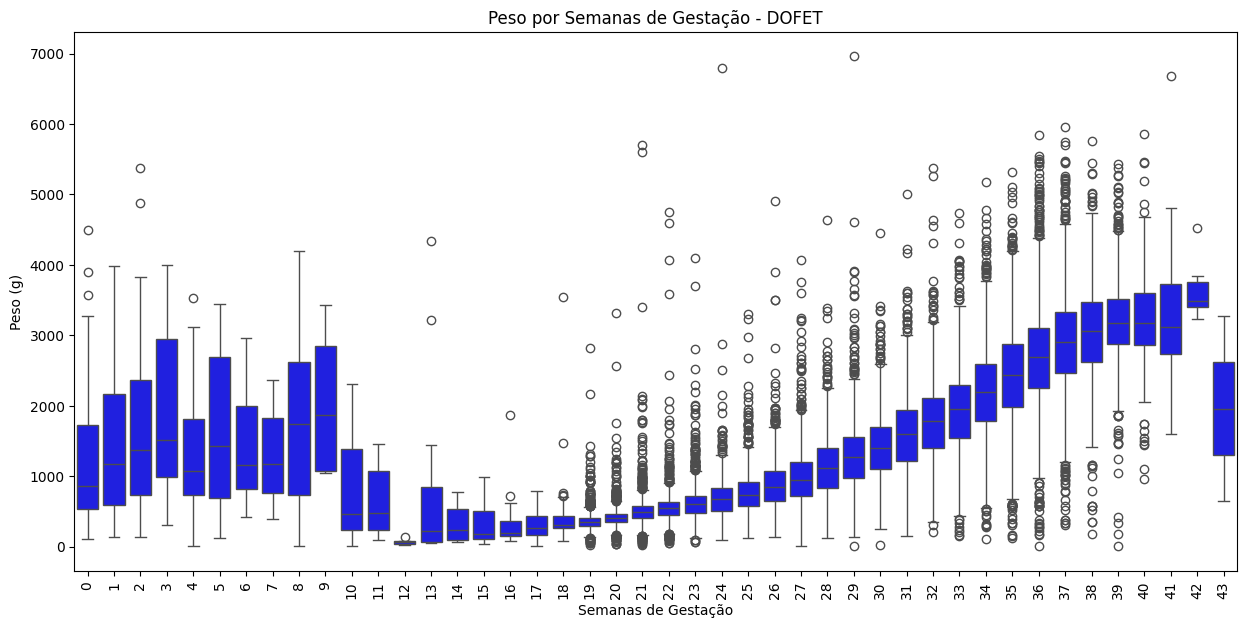

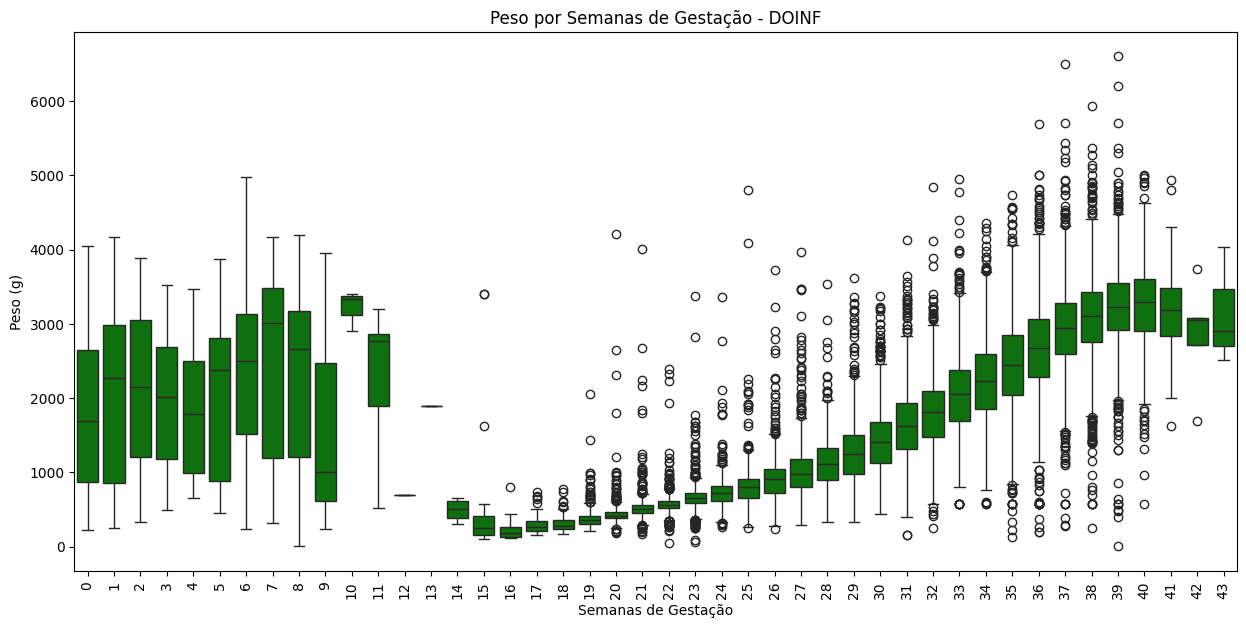

In [ ]:
# Boxplot do PESO por SEMAGESTAC
plt.figure(figsize=(15, 7))
sns.boxplot(x='SEMAGESTAC', y='PESO', data=df_dofet23_filtrado, color='blue')
plt.title('Peso por Semanas de Gestação - DOFET')
plt.xlabel('Semanas de Gestação')
plt.ylabel('Peso (g)')
plt.xticks(rotation=90) # Rotacionar os rótulos do eixo x para melhor visualização
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}')) # Remover .0s
plt.show()

plt.figure(figsize=(15, 7))
sns.boxplot(x='SEMAGESTAC', y='PESO', data=df_doinf23_filtrado, color='green')
plt.title('Peso por Semanas de Gestação - DOINF')
plt.xlabel('Semanas de Gestação')
plt.ylabel('Peso (g)')
plt.xticks(rotation=90) # Rotacionar os rótulos do eixo x para melhor visualização
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}')) # Remover .0s
plt.show()


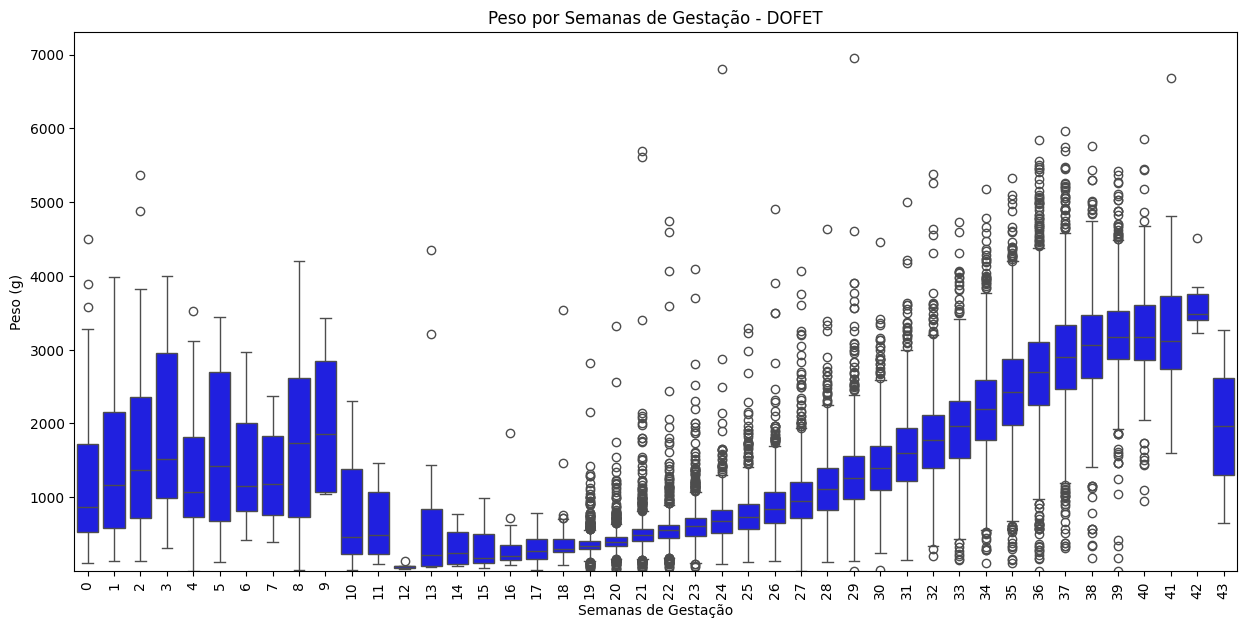

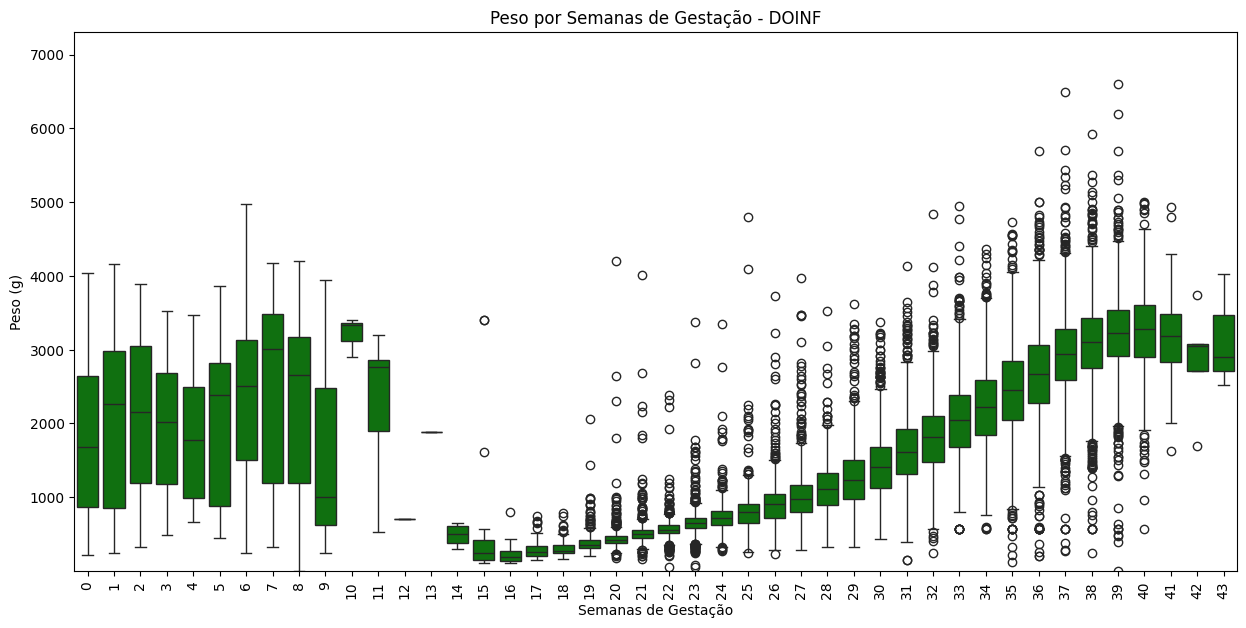

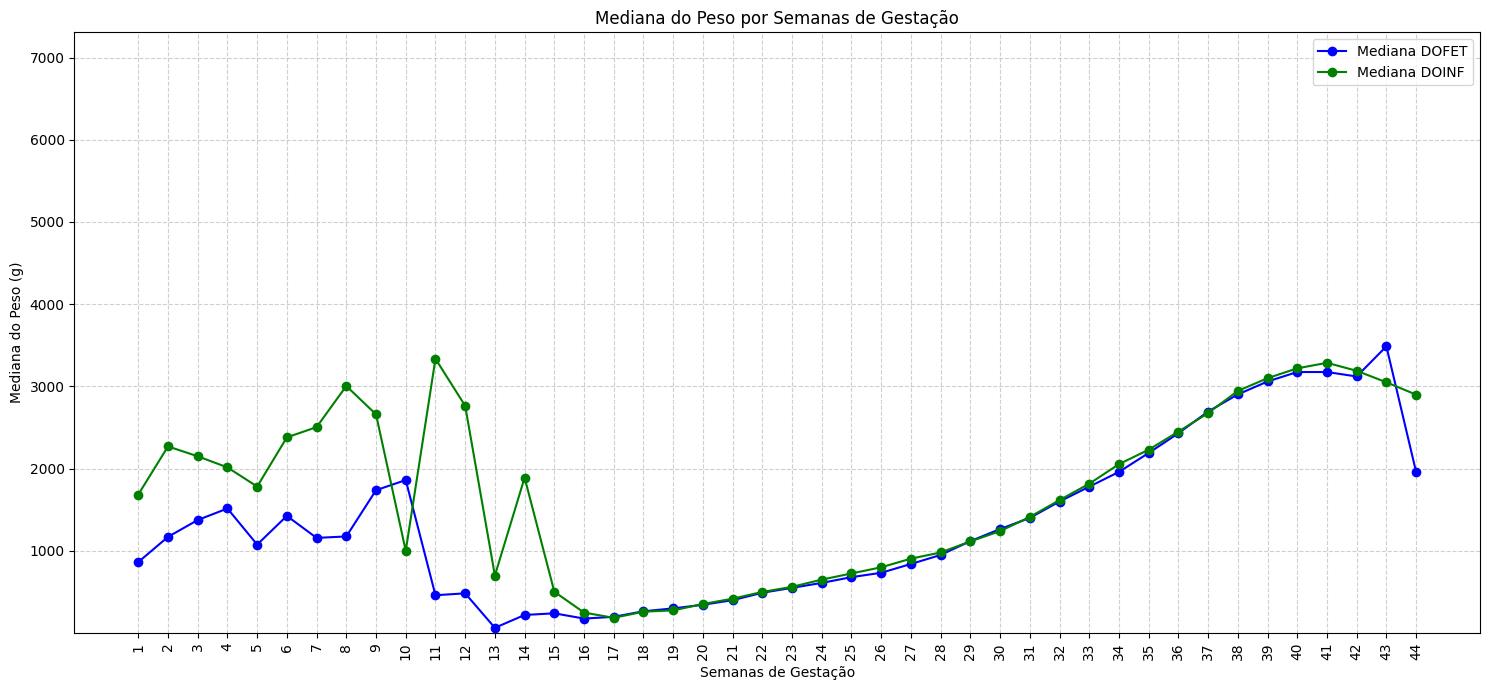

In [ ]:
# Calcular as medianas de PESO por SEMAGESTAC para cada dataframe
median_peso_dofet = df_dofet23_filtrado.groupby('SEMAGESTAC')['PESO'].median().reset_index()
median_peso_doinf = df_doinf23_filtrado.groupby('SEMAGESTAC')['PESO'].median().reset_index()

# Encontrar o valor máximo de PESO e o mínimo de PESO (excluindo 0s) para definir o limite do eixo Y
max_peso = max(df_dofet23_filtrado['PESO'].max(), df_doinf23_filtrado['PESO'].max())
min_peso = min(df_dofet23_filtrado[df_dofet23_filtrado['PESO'] > 0]['PESO'].min(),
               df_doinf23_filtrado[df_doinf23_filtrado['PESO'] > 0]['PESO'].min())

# Adicionar uma pequena margem ao eixo Y
y_limit_upper = max_peso * 1.05
y_limit_lower = min_peso * 0.95

# Plotar os Boxplots com eixo Y padronizado
plt.figure(figsize=(15, 7))
sns.boxplot(x='SEMAGESTAC', y='PESO', data=df_dofet23_filtrado, color='blue')
plt.title('Peso por Semanas de Gestação - DOFET')
plt.xlabel('Semanas de Gestação')
plt.ylabel('Peso (g)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.ylim(y_limit_lower, y_limit_upper) # Padronizar o eixo Y
plt.show()

plt.figure(figsize=(15, 7))
sns.boxplot(x='SEMAGESTAC', y='PESO', data=df_doinf23_filtrado, color='green')
plt.title('Peso por Semanas de Gestação - DOINF')
plt.xlabel('Semanas de Gestação')
plt.ylabel('Peso (g)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.ylim(y_limit_lower, y_limit_upper) # Padronizar o eixo Y
plt.show()

# Plotar o gráfico poligonal das medianas de peso por SEMAGESTAC
plt.figure(figsize=(15, 7))

# Plotar a linha poligonal para DOFET
plt.plot(median_peso_dofet['SEMAGESTAC'], median_peso_dofet['PESO'], marker='o', color='blue', label='Mediana DOFET')

# Plotar a linha poligonal para DOINF
plt.plot(median_peso_doinf['SEMAGESTAC'], median_peso_doinf['PESO'], marker='o', color='green', label='Mediana DOINF')

plt.title('Mediana do Peso por Semanas de Gestação')
plt.xlabel('Semanas de Gestação')
plt.ylabel('Mediana do Peso (g)')
plt.xticks(np.arange(median_peso_dofet['SEMAGESTAC'].min(), median_peso_dofet['SEMAGESTAC'].max()+1, 1), rotation=90) # Mostrar todas as semanas presentes
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(y_limit_lower, y_limit_upper) # Padronizar o eixo Y
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

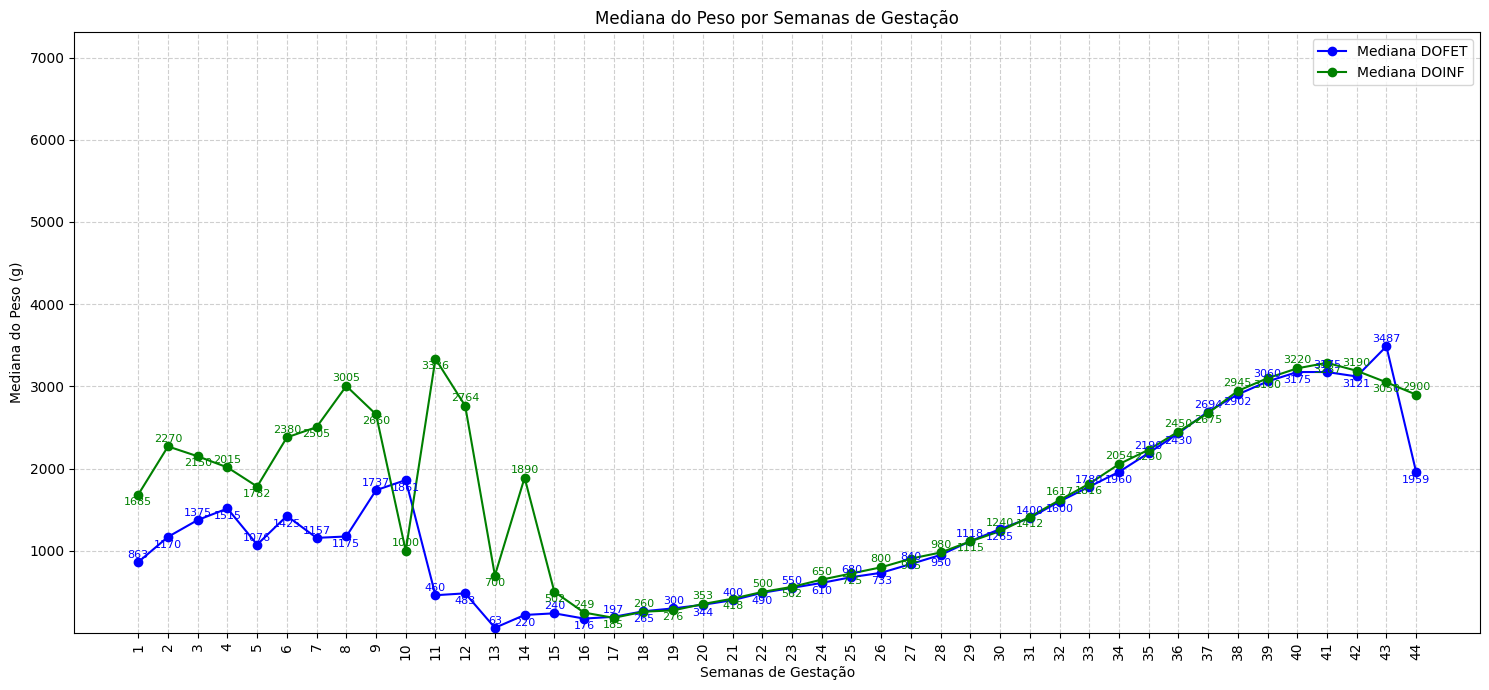

In [ ]:
# === GRÁFICO POLIGONAL COM VALORES NAS MEDIANAS ===
plt.figure(figsize=(15, 7))

# Poligonal DOFET
plt.plot(
    median_peso_dofet['SEMAGESTAC'],
    median_peso_dofet['PESO'],
    marker='o',
    color='blue',
    label='Mediana DOFET'
)
# Adicionar valores nos pontos da linha DOFET, alternando deslocamento
for i, (x, y) in enumerate(zip(median_peso_dofet['SEMAGESTAC'], median_peso_dofet['PESO'])):
    offset = 25 if i % 2 == 0 else -35  # alterna cima/baixo
    va = 'bottom' if offset > 0 else 'top'
    plt.text(x, y + offset, f'{int(y)}', color='blue', ha='center', va=va, fontsize=8)

# Poligonal DOINF
plt.plot(
    median_peso_doinf['SEMAGESTAC'],
    median_peso_doinf['PESO'],
    marker='o',
    color='green',
    label='Mediana DOINF'
)
# Adicionar valores nos pontos da linha DOINF, alternando deslocamento
for i, (x, y) in enumerate(zip(median_peso_doinf['SEMAGESTAC'], median_peso_doinf['PESO'])):
    offset = -25 if i % 2 == 0 else 35  # alterna cima/baixo (inverso do DOFET)
    va = 'bottom' if offset > 0 else 'top'
    plt.text(x, y + offset, f'{int(y)}', color='green', ha='center', va=va, fontsize=8)

# Ajustes finais
plt.title('Mediana do Peso por Semanas de Gestação')
plt.xlabel('Semanas de Gestação')
plt.ylabel('Mediana do Peso (g)')
plt.xticks(
    np.arange(median_peso_dofet['SEMAGESTAC'].min(), median_peso_dofet['SEMAGESTAC'].max() + 1, 1),
    rotation=90
)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(y_limit_lower, y_limit_upper)
plt.tight_layout()
plt.show()


In [ ]:
# Para df_dofet23_filtrado
n_dofet_semagestac = df_dofet23_filtrado.groupby('SEMAGESTAC').size().reset_index(name='n')
print("\nNúmero de observações por semanas de gestação (DOFET):")
print(n_dofet_semagestac)

# Para df_doinf23_filtrado
n_doinf_semagestac = df_doinf23_filtrado.groupby('SEMAGESTAC').size().reset_index(name='n')
print("\nNúmero de observações por semanas de gestação (DOINF):")
print(n_doinf_semagestac)


Número de observações por semanas de gestação (DOFET):
    SEMAGESTAC     n
0          1.0   144
1          2.0   108
2          3.0    71
3          4.0    45
4          5.0    30
5          6.0    11
6          7.0    13
7          8.0     8
8          9.0    17
9         10.0     4
10        11.0     4
11        12.0     7
12        13.0     6
13        14.0    15
14        15.0    20
15        16.0    39
16        17.0    34
17        18.0    66
18        19.0   110
19        20.0   771
20        21.0  1013
21        22.0  1454
22        23.0  1209
23        24.0  1144
24        25.0  1016
25        26.0  1045
26        27.0  1013
27        28.0  1106
28        29.0   937
29        30.0  1108
30        31.0  1172
31        32.0  1216
32        33.0  1108
33        34.0  1175
34        35.0  1317
35        36.0  1448
36        37.0  1453
37        38.0  1278
38        39.0  1089
39        40.0   772
40        41.0   242
41        42.0    41
42        43.0     6
43        44.0     2

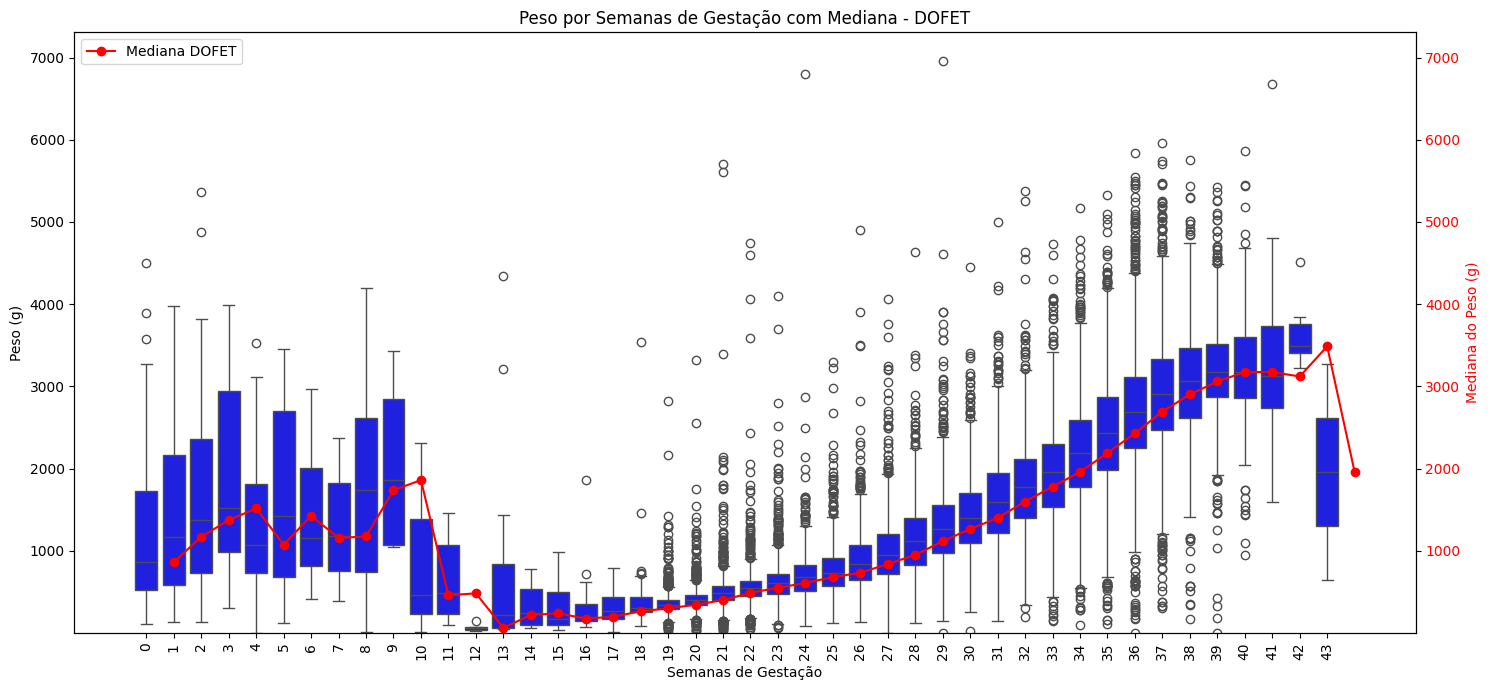

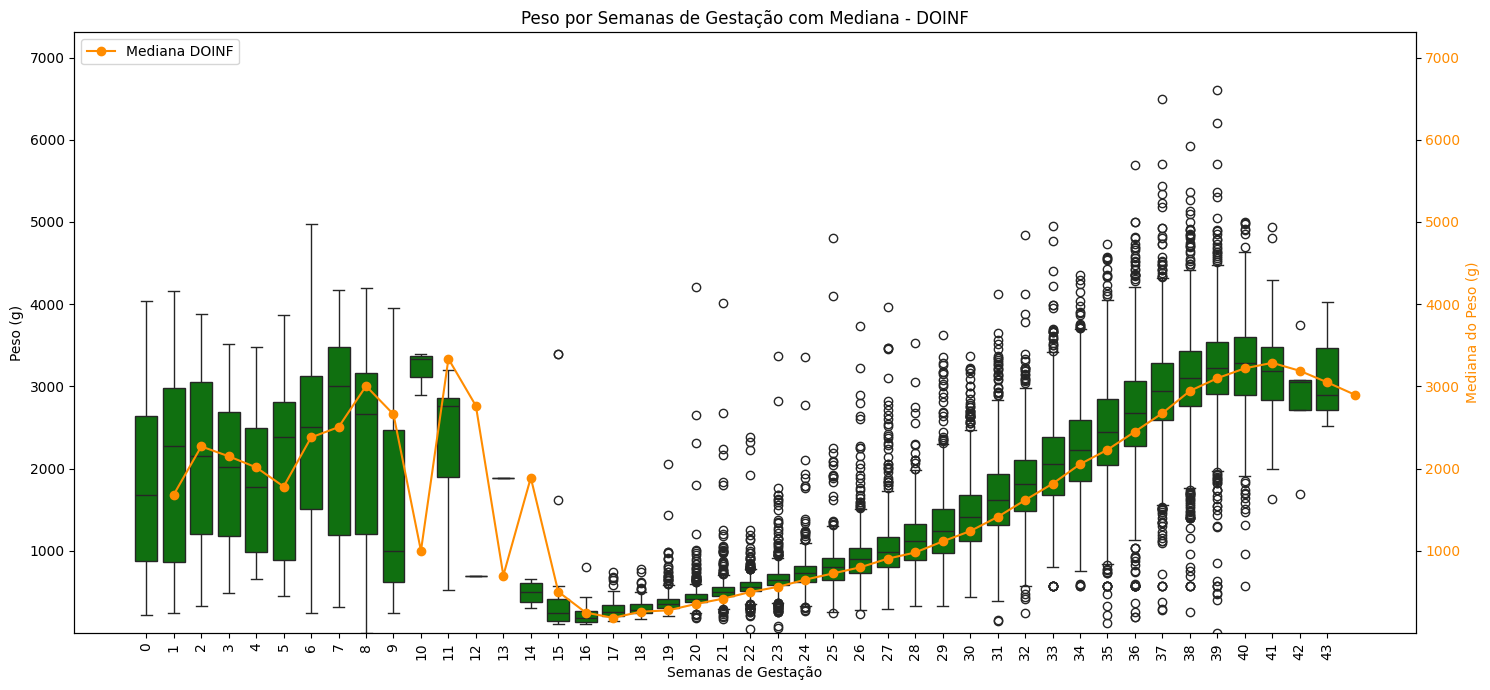

In [ ]:
# Plotar os Boxplots com a linha poligonal das medianas em cada gráfico
# Gráfico para DOFET
plt.figure(figsize=(15, 7))
ax1 = sns.boxplot(x='SEMAGESTAC', y='PESO', data=df_dofet23_filtrado, color='blue')
plt.title('Peso por Semanas de Gestação com Mediana - DOFET')
plt.xlabel('Semanas de Gestação')
plt.ylabel('Peso (g)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.ylim(y_limit_lower, y_limit_upper) # Padronizar o eixo Y

# Criar um segundo eixo para a linha poligonal
ax2 = ax1.twinx()
# Plotar a linha poligonal para DOFET no segundo eixo
ax2.plot(median_peso_dofet['SEMAGESTAC'], median_peso_dofet['PESO'], marker='o', color='red', label='Mediana DOFET')
ax2.set_ylabel('Mediana do Peso (g)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(y_limit_lower, y_limit_upper) # Manter o mesmo limite do eixo Y

# Combine as legendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Gráfico para DOINF
plt.figure(figsize=(15, 7))
ax1 = sns.boxplot(x='SEMAGESTAC', y='PESO', data=df_doinf23_filtrado, color='green')
plt.title('Peso por Semanas de Gestação com Mediana - DOINF')
plt.xlabel('Semanas de Gestação')
plt.ylabel('Peso (g)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.ylim(y_limit_lower, y_limit_upper) # Padronizar o eixo Y

# Criar um segundo eixo para a linha poligonal
ax2 = ax1.twinx()
# Plotar a linha poligonal para DOINF no segundo eixo
ax2.plot(median_peso_doinf['SEMAGESTAC'], median_peso_doinf['PESO'], marker='o', color='darkorange', label='Mediana DOINF')
ax2.set_ylabel('Mediana do Peso (g)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
ax2.set_ylim(y_limit_lower, y_limit_upper) # Manter o mesmo limite do eixo Y

# Combine as legendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()



# 3.10

Causa Básica de Óbito

Causas Básicas de Óbito

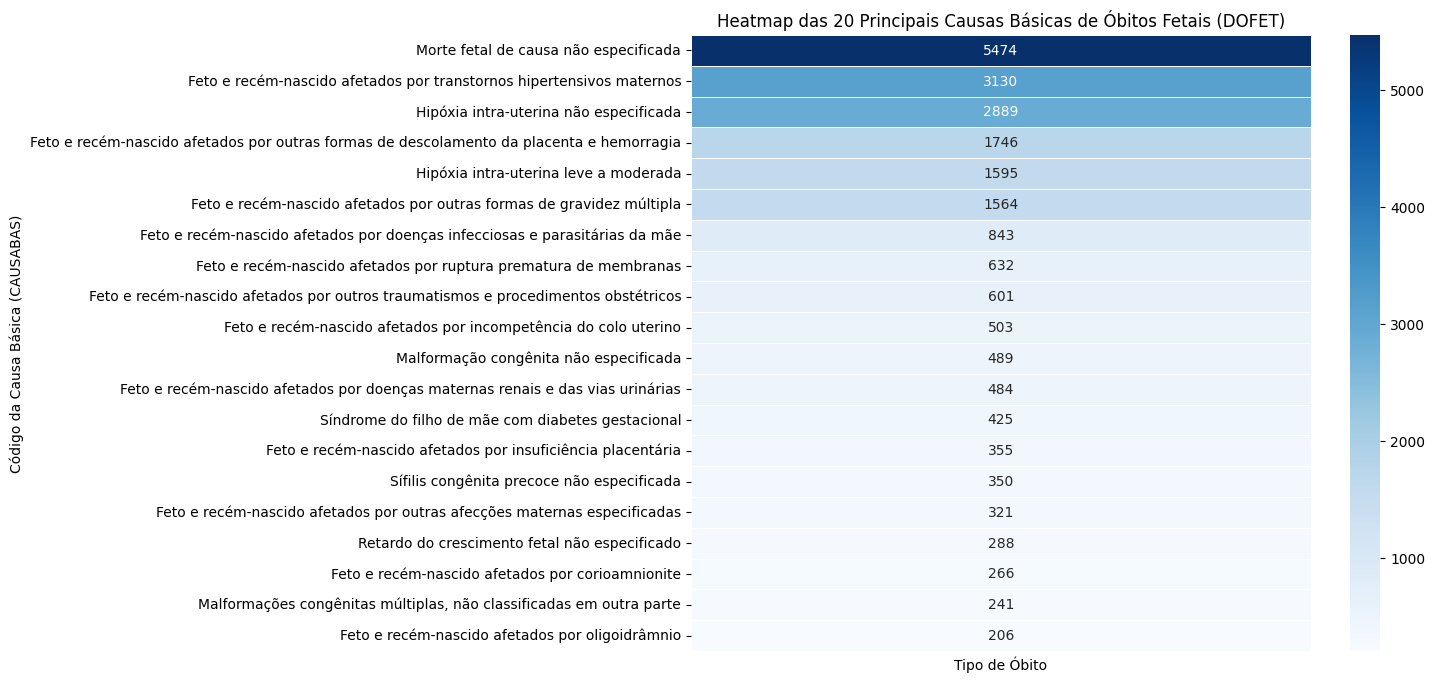

In [ ]:
# Obter as 20 principais causas básicas para DOFET
top_20_causabas_dofet = df_dofet23_filtrado['CAUSABAS'].value_counts().head(20)

# Criar um DataFrame com as contagens das top 20 causas para o heatmap
# Precisamos transformar a Series em um DataFrame para usar com o heatmap
heatmap_data_dofet = top_20_causabas_dofet.reset_index()
heatmap_data_dofet.columns = ['CAUSABAS', 'Contagem']
heatmap_data_dofet = heatmap_data_dofet.set_index('CAUSABAS')

# Criar o heatmap para as top 20 causas básicas do DOFET
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_dofet, annot=True, fmt='g', cmap='Blues', linewidths=.5)
plt.title('Heatmap das 20 Principais Causas Básicas de Óbitos Fetais (DOFET)')
plt.xlabel('Tipo de Óbito')
plt.ylabel('Código da Causa Básica (CAUSABAS)')
plt.xticks([]) # Remover rótulos do eixo x, pois só temos uma coluna
plt.yticks(rotation=0, ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5],
           labels=['Morte fetal de causa não especificada'
           ,'Feto e recém-nascido afetados por transtornos hipertensivos maternos'
           , 'Hipóxia intra-uterina não especificada'
           ,'Feto e recém-nascido afetados por outras formas de descolamento da placenta e hemorragia'
,'Hipóxia intra-uterina leve a moderada'
,'Feto e recém-nascido afetados por outras formas de gravidez múltipla'
,'Feto e recém-nascido afetados por doenças infecciosas e parasitárias da mãe'
,'Feto e recém-nascido afetados por ruptura prematura de membranas'
,'Feto e recém-nascido afetados por outros traumatismos e procedimentos obstétricos'
,'Feto e recém-nascido afetados por incompetência do colo uterino'
,'Malformação congênita não especificada'
,'Feto e recém-nascido afetados por doenças maternas renais e das vias urinárias'
,'Síndrome do filho de mãe com diabetes gestacional'
,'Feto e recém-nascido afetados por insuficiência placentária'
,'Sífilis congênita precoce não especificada'
,'Feto e recém-nascido afetados por outras afecções maternas especificadas'
,'Retardo do crescimento fetal não especificado'
,'Feto e recém-nascido afetados por corioamnionite'
,'Malformações congênitas múltiplas, não classificadas em outra parte'
,'Feto e recém-nascido afetados por oligoidrâmnio'])
plt.show()

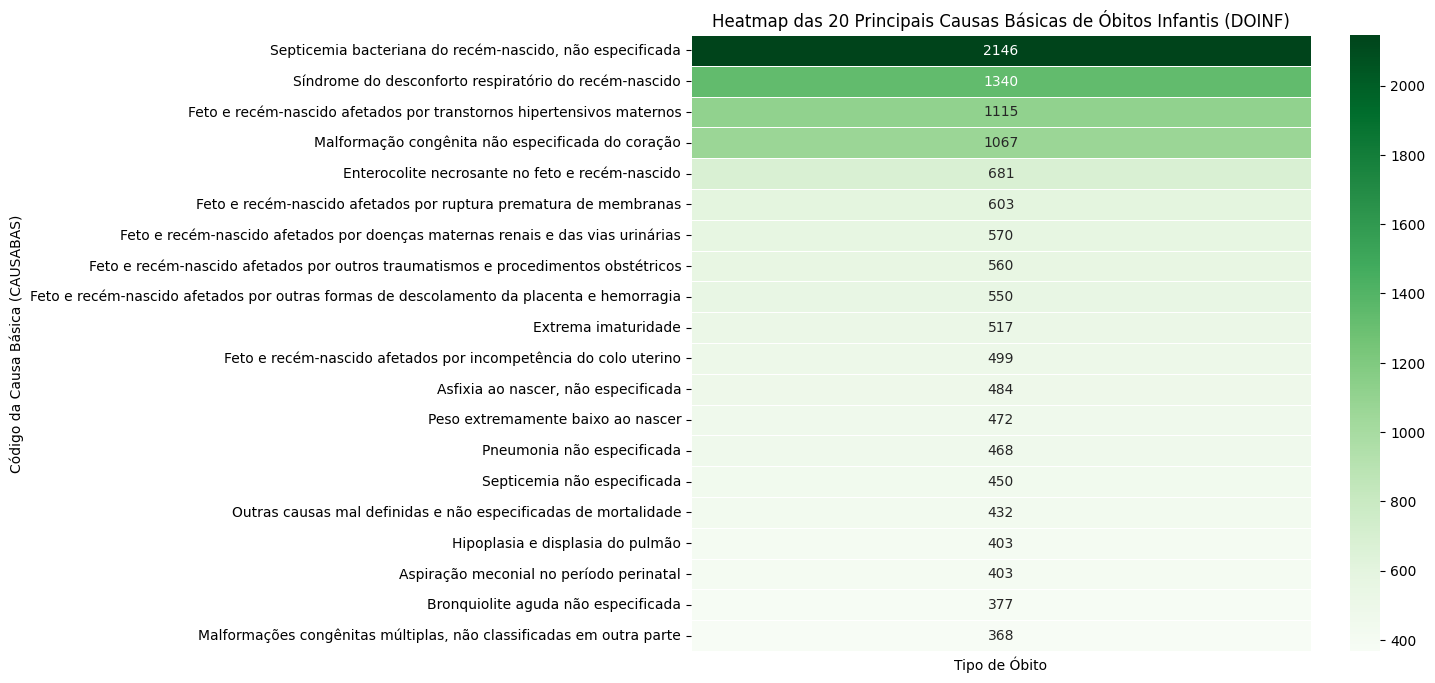

In [ ]:
# Obter as 20 principais causas básicas para DOINF
top_20_causabas_doinf = df_doinf23_filtrado['CAUSABAS'].value_counts().head(20)

# Criar um DataFrame com as contagens das top 20 causas para o heatmap
heatmap_data_doinf = top_20_causabas_doinf.reset_index()
heatmap_data_doinf.columns = ['CAUSABAS', 'Contagem']
heatmap_data_doinf = heatmap_data_doinf.set_index('CAUSABAS')

# Criar o heatmap para as top 20 causas básicas do DOINF
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_doinf, annot=True, fmt='g', cmap='Greens', linewidths=.5)
plt.title('Heatmap das 20 Principais Causas Básicas de Óbitos Infantis (DOINF)')
plt.xlabel('Tipo de Óbito')
plt.ylabel('Código da Causa Básica (CAUSABAS)')
plt.xticks([]) # Remover rótulos do eixo x, pois só temos uma coluna
plt.yticks(rotation=0, ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5], labels=['Septicemia bacteriana do recém-nascido, não especificada',
'Síndrome do desconforto respiratório do recém-nascido',
'Feto e recém-nascido afetados por transtornos hipertensivos maternos',
'Malformação congênita não especificada do coração',
'Enterocolite necrosante no feto e recém-nascido',
'Feto e recém-nascido afetados por ruptura prematura de membranas',
'Feto e recém-nascido afetados por doenças maternas renais e das vias urinárias',
'Feto e recém-nascido afetados por outros traumatismos e procedimentos obstétricos',
'Feto e recém-nascido afetados por outras formas de descolamento da placenta e hemorragia',
'Extrema imaturidade',
'Feto e recém-nascido afetados por incompetência do colo uterino',
'Asfixia ao nascer, não especificada',
'Peso extremamente baixo ao nascer',
'Pneumonia não especificada',
'Septicemia não especificada',
'Outras causas mal definidas e não especificadas de mortalidade',
'Hipoplasia e displasia do pulmão',
'Aspiração meconial no período perinatal',
'Bronquiolite aguda não especificada',
'Malformações congênitas múltiplas, não classificadas em outra parte'])
plt.show()

# Análises Complementares

Distribuição do Peso

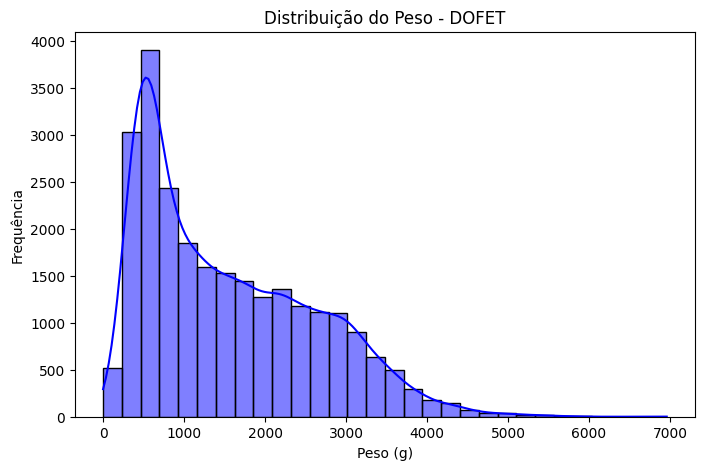

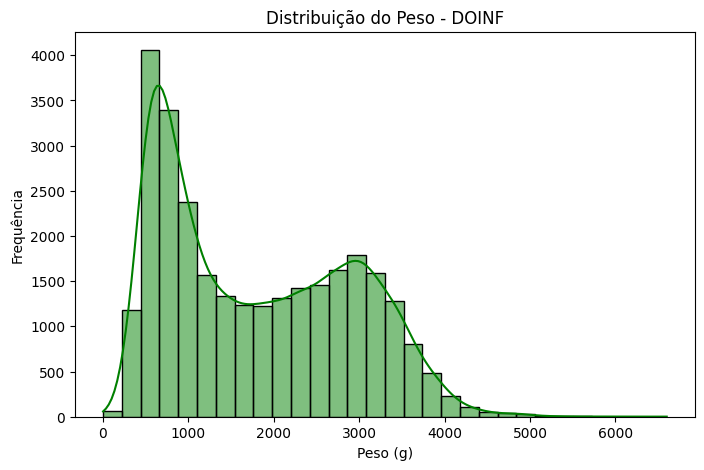

In [ ]:
# Histograma do peso
plt.figure(figsize=(8, 5))
sns.histplot(df_dofet23_filtrado['PESO'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribuição do Peso - DOFET')
plt.xlabel('Peso (g)')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_doinf23_filtrado['PESO'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribuição do Peso - DOINF')
plt.xlabel('Peso (g)')
plt.ylabel('Frequência')
plt.show()

Idade Infantil

/tmp/ipython-input-22-1996033028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doinf23_filtrado['IDADE'] = df_doinf23_filtrado['IDADE'].replace(9999, np.nan)


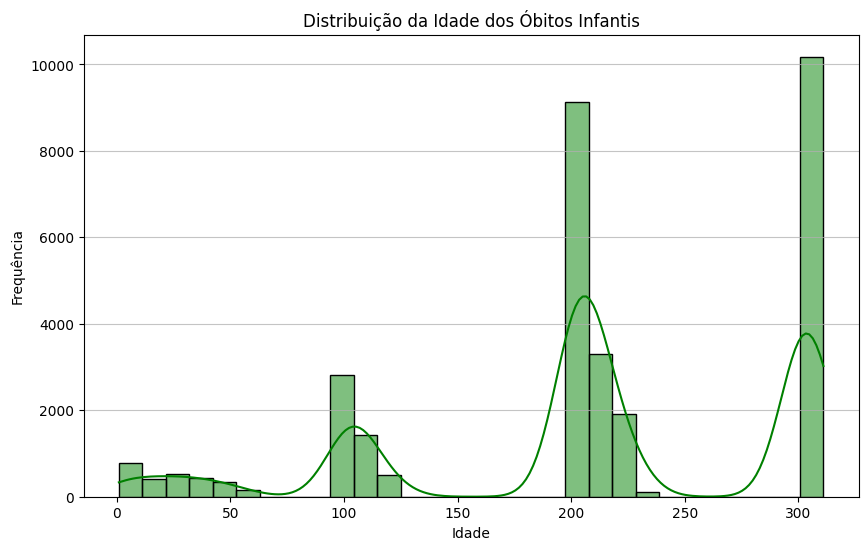

In [ ]:
# Substituir valores inválidos (9999) na coluna 'IDADE' por NaN
df_doinf23_filtrado['IDADE'] = df_doinf23_filtrado['IDADE'].replace(9999, np.nan)

# Criar um histograma da frequência da variável 'IDADE'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_doinf23_filtrado, x='IDADE', bins=30, kde=True, color='green')
plt.title('Distribuição da Idade dos Óbitos Infantis')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

Duração da Gestação

/tmp/ipython-input-32-1120872936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dofet23_filtrado['SEMAGESTAC'] = df_dofet23_filtrado['SEMAGESTAC'].replace(0, np.nan)
/tmp/ipython-input-32-1120872936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doinf23_filtrado['SEMAGESTAC'] = df_doinf23_filtrado['SEMAGESTAC'].replace(0, np.nan)
/tmp/ipython-input-32-1120872936.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

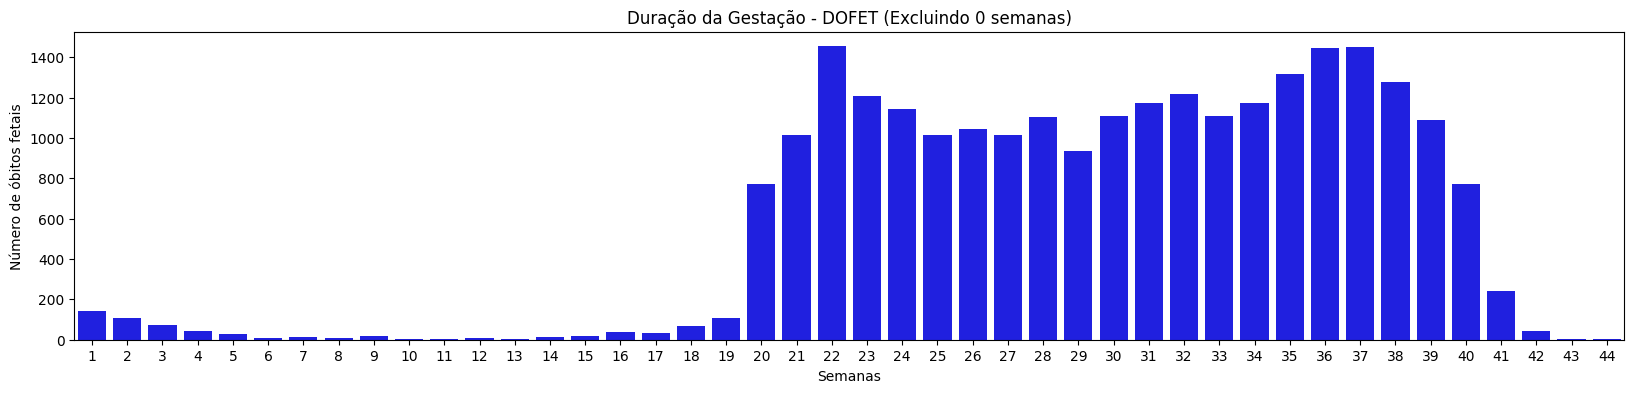

/tmp/ipython-input-32-1120872936.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doinf23_sem_zeros['SEMAGESTAC'] = df_doinf23_sem_zeros['SEMAGESTAC'].astype(int)


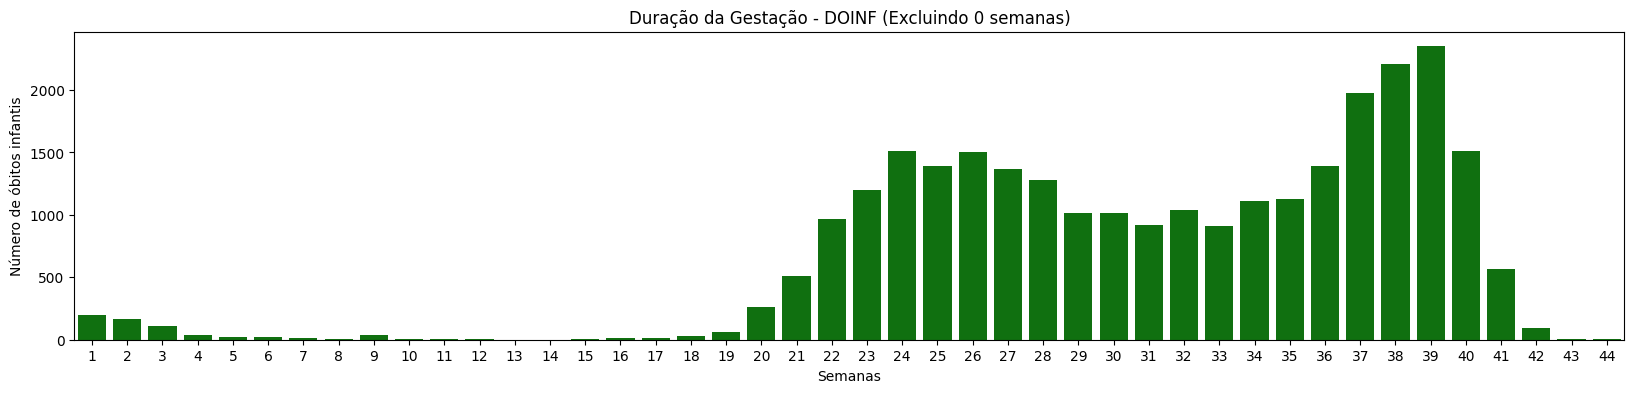

In [ ]:
# Remover 0s da coluna SEMAGESTAC (considerando 0 como valor inválido)
df_dofet23_filtrado['SEMAGESTAC'] = df_dofet23_filtrado['SEMAGESTAC'].replace(0, np.nan)
df_doinf23_filtrado['SEMAGESTAC'] = df_doinf23_filtrado['SEMAGESTAC'].replace(0, np.nan)

# Remover linhas com NaN na coluna SEMAGESTAC para o countplot
df_dofet23_sem_zeros = df_dofet23_filtrado.dropna(subset=['SEMAGESTAC'])
df_doinf23_sem_zeros = df_doinf23_filtrado.dropna(subset=['SEMAGESTAC'])


# Duração da gestação X óbitos (com 0s removidos)
plt.figure(figsize=(20, 4))
# Converter SEMAGESTAC para int para evitar problemas com valores NaN no countplot
df_dofet23_sem_zeros['SEMAGESTAC'] = df_dofet23_sem_zeros['SEMAGESTAC'].astype(int)
sns.countplot(data=df_dofet23_sem_zeros, x='SEMAGESTAC', color='blue')
plt.title('Duração da Gestação - DOFET (Excluindo 0 semanas)')
plt.xlabel('Semanas')
plt.ylabel('Número de óbitos fetais')
plt.show()

plt.figure(figsize=(20, 4))
# Converter SEMAGESTAC para int para evitar problemas com valores NaN no countplot
df_doinf23_sem_zeros['SEMAGESTAC'] = df_doinf23_sem_zeros['SEMAGESTAC'].astype(int)
sns.countplot(data=df_doinf23_sem_zeros, x='SEMAGESTAC', color='green')
plt.title('Duração da Gestação - DOINF (Excluindo 0 semanas)')
plt.xlabel('Semanas')
plt.ylabel('Número de óbitos infantis')
plt.show()

Local de Ocorrência

/tmp/ipython-input-33-1434702969.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Hospital', 'Outro \nEstab \nde Saúde', 'Domicílio', 'Via \nPública', 'Outro', 'Aldeia \nIndígena', 'Ignorado'])
/tmp/ipython-input-33-1434702969.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Hospital', 'Outro \nEstab \nde Saúde', 'Domicílio', 'Via \nPública', 'Outro', 'Aldeia \nIndígena', 'Ignorado'])


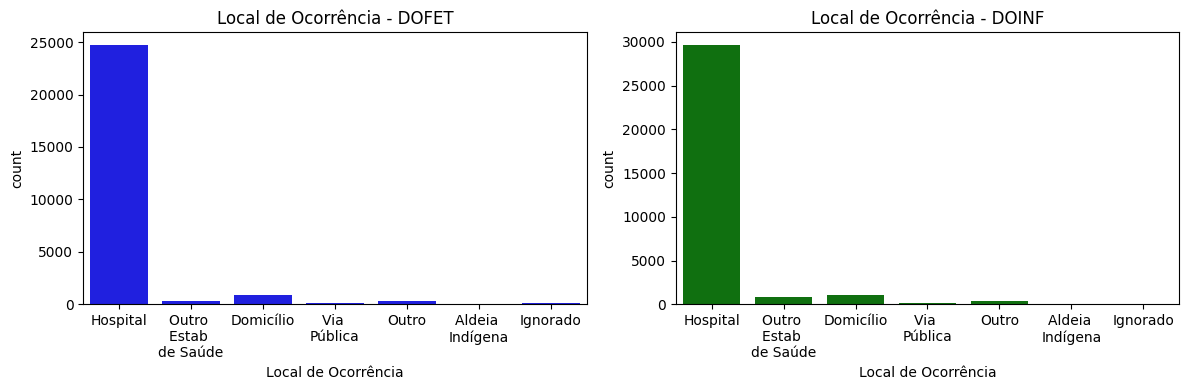

In [ ]:
# Local de ocorrência
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df_dofet23_filtrado, x='LOCOCOR', ax=ax[0], color='blue')
ax[0].set_title('Local de Ocorrência - DOFET')
ax[0].set_xlabel('Local de Ocorrência')
ax[0].set_xticklabels(['Hospital', 'Outro \nEstab \nde Saúde', 'Domicílio', 'Via \nPública', 'Outro', 'Aldeia \nIndígena', 'Ignorado'])
sns.countplot(data=df_doinf23_filtrado, x='LOCOCOR', ax=ax[1], color='green')
ax[1].set_title('Local de Ocorrência - DOINF')
ax[1].set_xlabel('Local de Ocorrência')
ax[1].set_xticklabels(['Hospital', 'Outro \nEstab \nde Saúde', 'Domicílio', 'Via \nPública', 'Outro', 'Aldeia \nIndígena', 'Ignorado'])
plt.tight_layout()
plt.show()

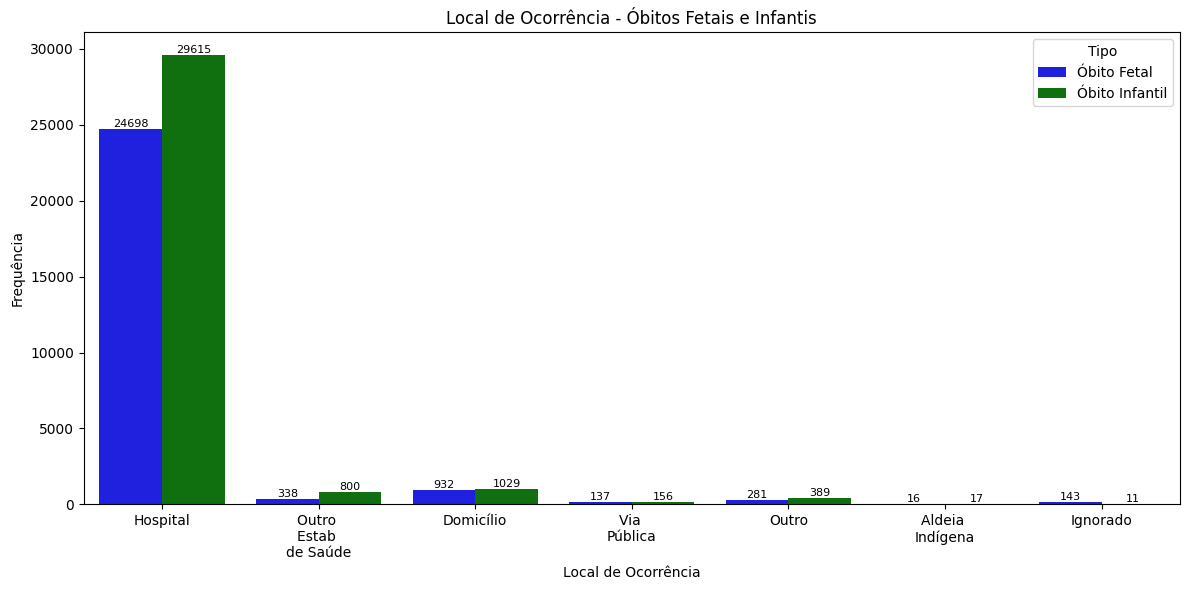

In [ ]:
# Criar um DataFrame combinado para plotagem
df_lococor_fetal = df_dofet23_filtrado[['LOCOCOR']].dropna().copy()
df_lococor_fetal['Tipo'] = 'Óbito Fetal'

df_lococor_infantil = df_doinf23_filtrado[['LOCOCOR']].dropna().copy()
df_lococor_infantil['Tipo'] = 'Óbito Infantil'

df_lococor_combinado = pd.concat([df_lococor_fetal, df_lococor_infantil], ignore_index=True)

# Mapeamento para os rótulos do eixo X
lococor_labels = {
    1: 'Hospital',
    2: 'Outro \nEstab \nde Saúde',
    3: 'Domicílio',
    4: 'Via \nPública',
    5: 'Outro',
    6: 'Aldeia \nIndígena',
    9: 'Ignorado'
}

# Substituir os códigos pelos rótulos para melhor visualização no plot
df_lococor_combinado['LOCOCOR_label'] = df_lococor_combinado['LOCOCOR'].map(lococor_labels)

# Plot combinado com barras lado a lado
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df_lococor_combinado,
    x='LOCOCOR_label',
    hue='Tipo',
    palette={'Óbito Fetal': 'blue', 'Óbito Infantil': 'green'},
    order=[lococor_labels[k] for k in sorted(lococor_labels.keys()) if k in df_lococor_combinado['LOCOCOR'].unique()]
)

# Adicionar valores acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.title('Local de Ocorrência - Óbitos Fetais e Infantis')
plt.xlabel('Local de Ocorrência')
plt.ylabel('Frequência')
plt.xticks(rotation=0) # Mantém os rótulos na horizontal
plt.tight_layout()
plt.show()

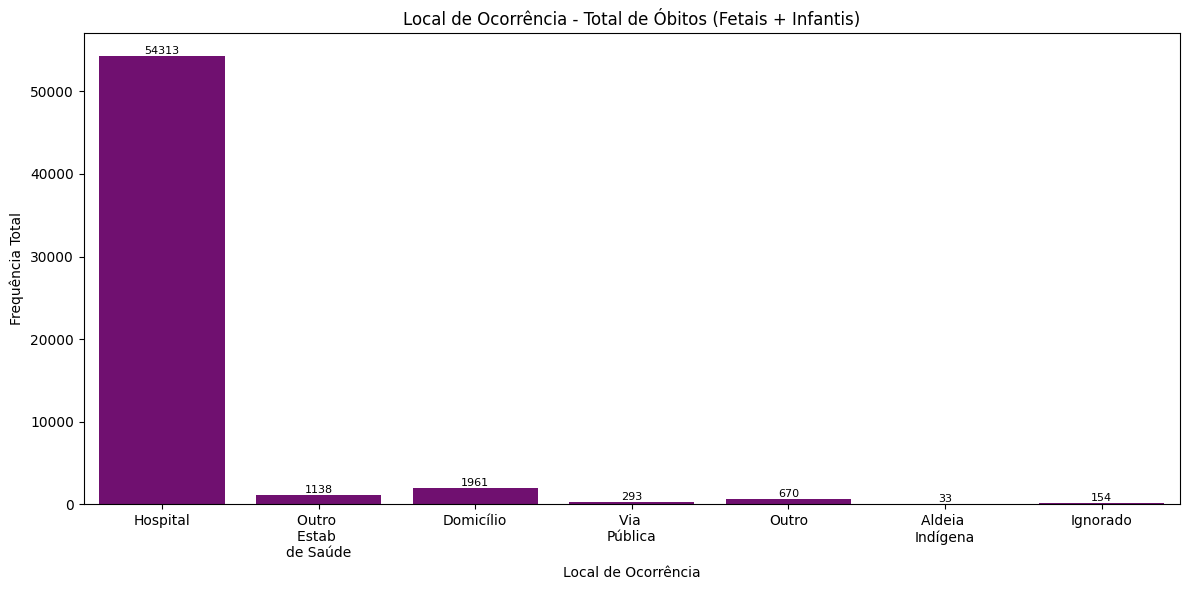

In [ ]:
# Agrupar por local de ocorrência e somar as contagens para óbitos fetais e infantis
df_lococor_total = df_lococor_combinado.groupby('LOCOCOR_label')['Tipo'].count().reset_index(name='Total de Óbitos')

# Plot com as barras somadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_lococor_total,
    x='LOCOCOR_label',
    y='Total de Óbitos',
    color='purple', # Cor única para as barras somadas
    order=[lococor_labels[k] for k in sorted(lococor_labels.keys()) if lococor_labels[k] in df_lococor_total['LOCOCOR_label'].unique()]
)

# Adicionar valores acima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

plt.title('Local de Ocorrência - Total de Óbitos (Fetais + Infantis)')
plt.xlabel('Local de Ocorrência')
plt.ylabel('Frequência Total')
plt.xticks(rotation=0) # Mantém os rótulos na horizontal
plt.tight_layout()
plt.show()


Idade da Mãe por Tipo de Parto

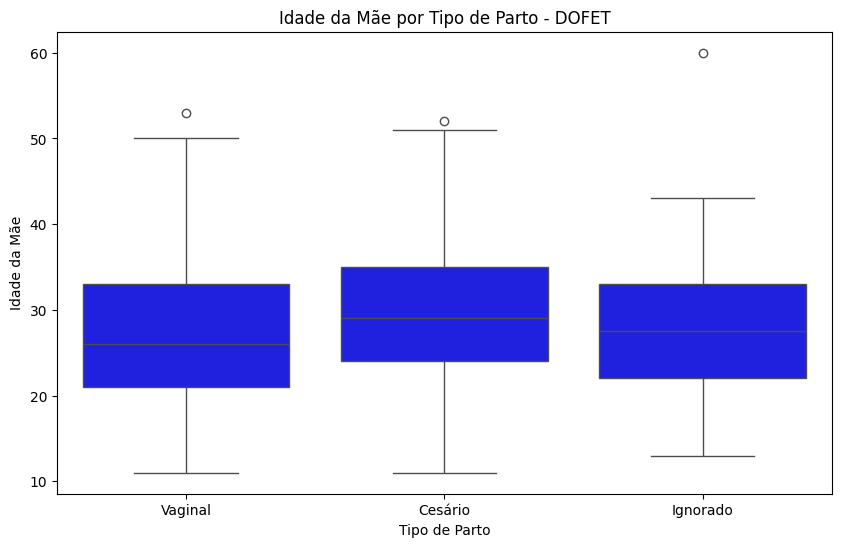

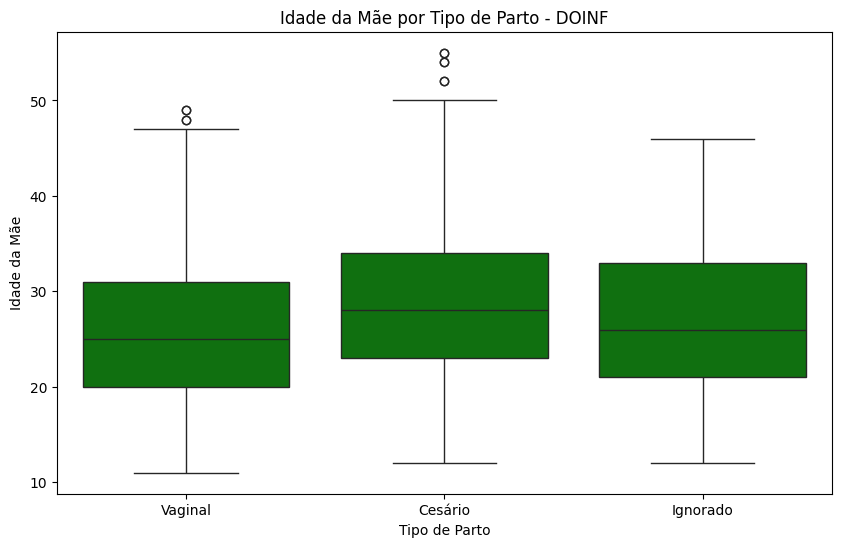

In [ ]:
# Boxplot de IDADEMAE por PARTO para DOFET
plt.figure(figsize=(10, 6))
sns.boxplot(x='PARTO', y='IDADEMAE', data=df_dofet23_filtrado, color='blue')
plt.title('Idade da Mãe por Tipo de Parto - DOFET')
plt.xlabel('Tipo de Parto')
plt.xticks([0,1,2], ['Vaginal', 'Cesário', 'Ignorado'])
plt.ylabel('Idade da Mãe')
plt.show()

# Boxplot de IDADEMAE por PARTO para DOINF
plt.figure(figsize=(10, 6))
sns.boxplot(x='PARTO', y='IDADEMAE', data=df_doinf23_filtrado, color='green')
plt.title('Idade da Mãe por Tipo de Parto - DOINF')
plt.xlabel('Tipo de Parto')
plt.xticks([0,1,2], ['Vaginal', 'Cesário', 'Ignorado'])
plt.ylabel('Idade da Mãe')
plt.show()


Quantidade de Filhos Vivos e Mortos

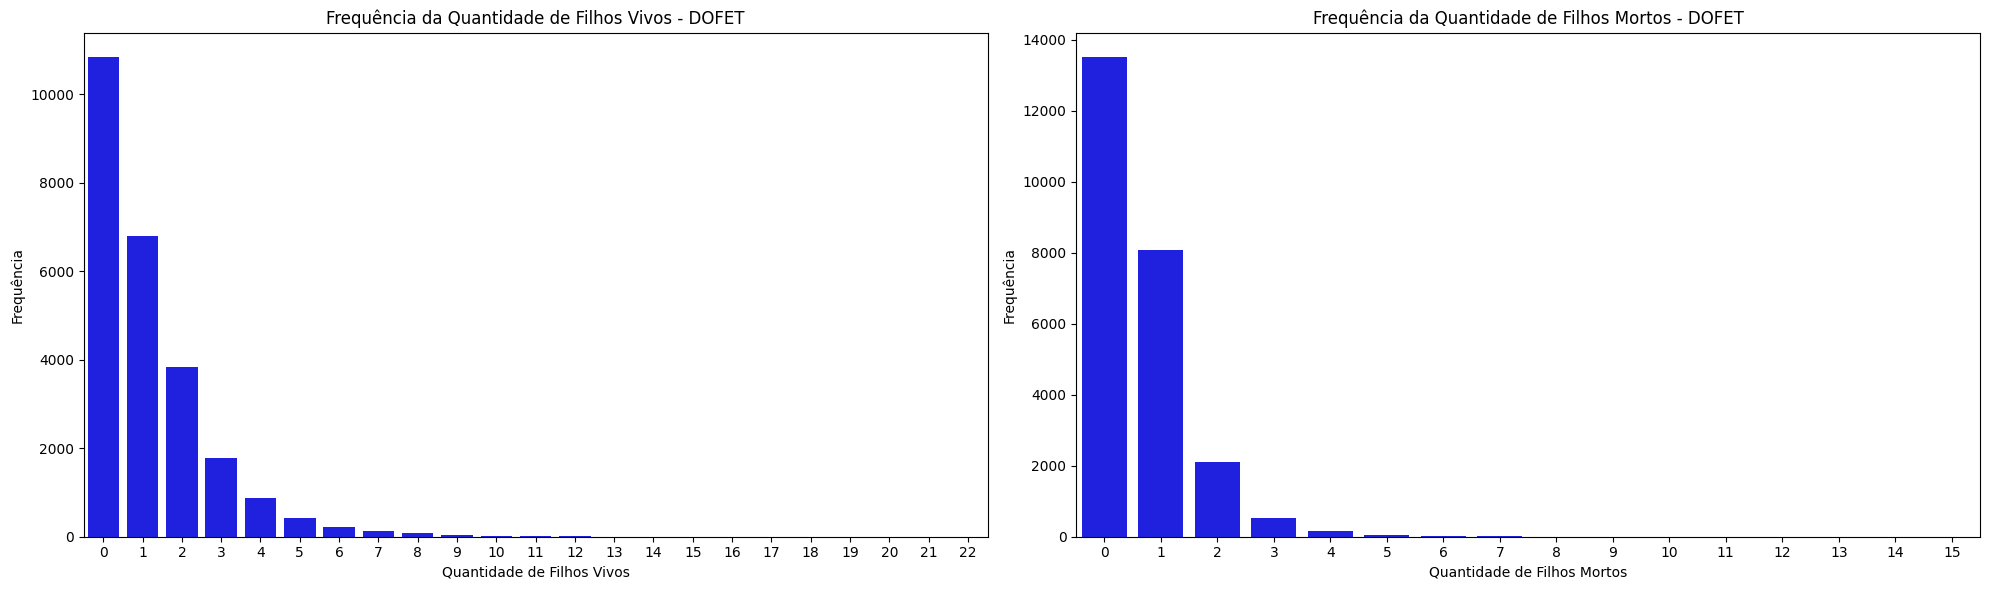

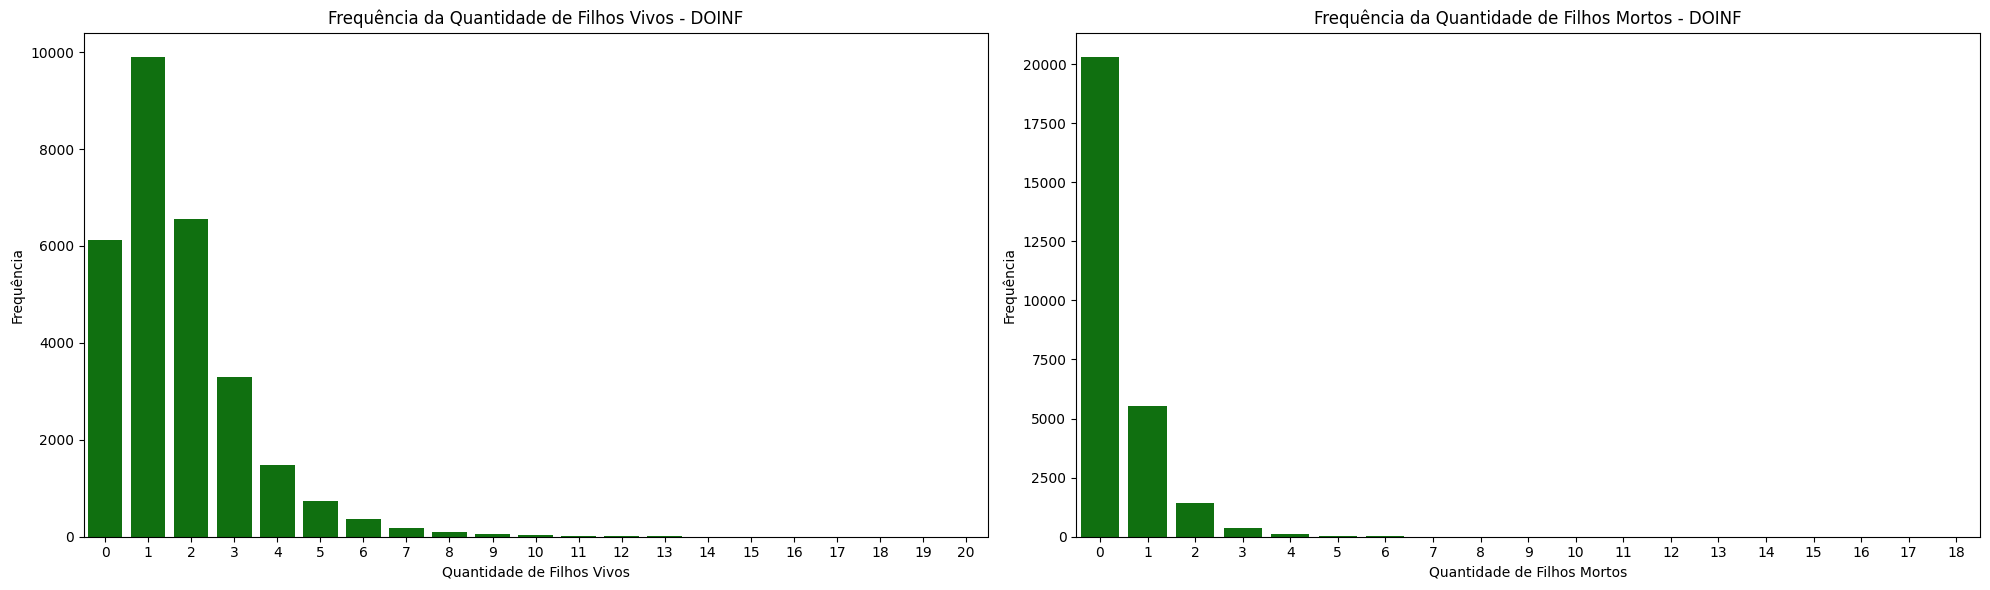

In [ ]:
# Gráfico de frequência para QTDFILVIVO e QTDFILMORT no DOFET
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_dofet23_filtrado, x='QTDFILVIVO', color='blue')
plt.title('Frequência da Quantidade de Filhos Vivos - DOFET')
plt.xlabel('Quantidade de Filhos Vivos')
plt.ylabel('Frequência')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.subplot(1, 2, 2)
sns.countplot(data=df_dofet23_filtrado, x='QTDFILMORT', color='blue')
plt.title('Frequência da Quantidade de Filhos Mortos - DOFET')
plt.xlabel('Quantidade de Filhos Mortos')
plt.ylabel('Frequência')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.tight_layout()
plt.show()
# Gráfico de frequência para QTDFILVIVO e QTDFILMORT no DOINF
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_doinf23_filtrado, x='QTDFILVIVO', color='green')
plt.title('Frequência da Quantidade de Filhos Vivos - DOINF')
plt.xlabel('Quantidade de Filhos Vivos')
plt.ylabel('Frequência')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.subplot(1, 2, 2)
sns.countplot(data=df_doinf23_filtrado, x='QTDFILMORT', color='green')
plt.title('Frequência da Quantidade de Filhos Mortos - DOINF')
plt.xlabel('Quantidade de Filhos Mortos')
plt.ylabel('Frequência')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.tight_layout()
plt.show()


Tipo de Gravidez

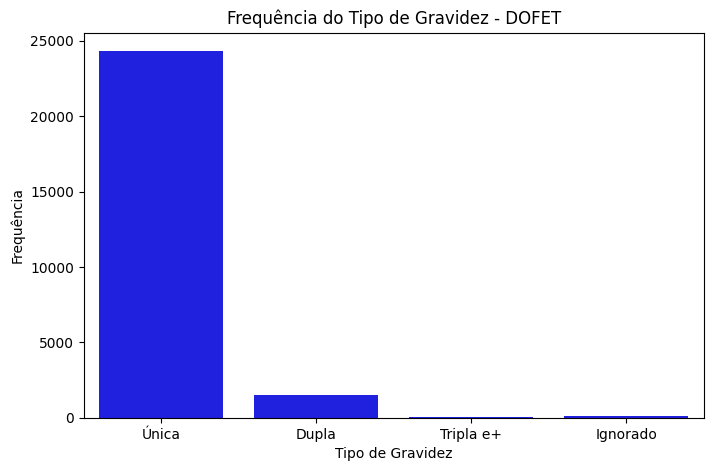

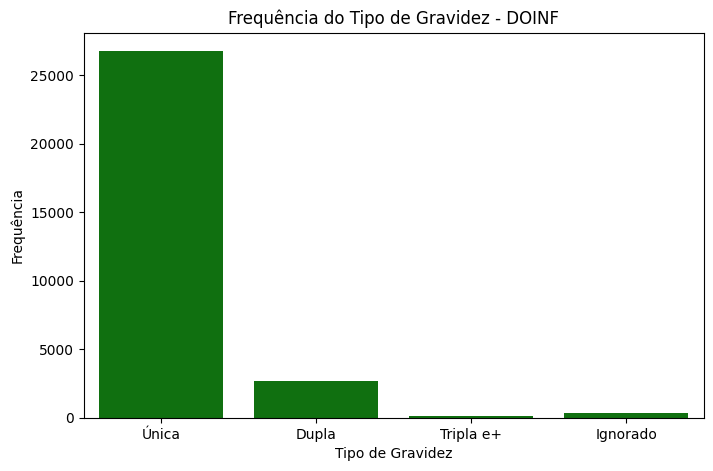

In [ ]:
# Gráfico de frequência para GRAVIDEZ no DOFET
plt.figure(figsize=(8, 5))
sns.countplot(data=df_dofet23_filtrado, x='GRAVIDEZ', color='blue')
plt.title('Frequência do Tipo de Gravidez - DOFET')
plt.xlabel('Tipo de Gravidez')
plt.xticks([0,1,2,3], ['Única', 'Dupla', 'Tripla e+', 'Ignorado'])
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df_doinf23_filtrado, x='GRAVIDEZ', color='green')
plt.title('Frequência do Tipo de Gravidez - DOINF')
plt.xlabel('Tipo de Gravidez')
plt.xticks([0,1,2,3], ['Única', 'Dupla', 'Tripla e+', 'Ignorado'])
plt.ylabel('Frequência')
plt.show()

# Gráfico de frequência para OBITOGRAV no DOINF (equivalente a GRAVIDEZ no contexto de óbitos)
# Primeiro, vamos verificar os valores únicos e suas contagens na coluna OBITOGRAV
#print("\nFrequência de OBITOGRAV - DOINF:")
#print(df_doinf23_filtrado['GRAVIDEZ'].value_counts(dropna=False))

Análise Geográfica por Município, Sem Normalização


Correlação entre a frequência de óbitos fetais e infantis por município (CODMUNOCOR): 0.9701


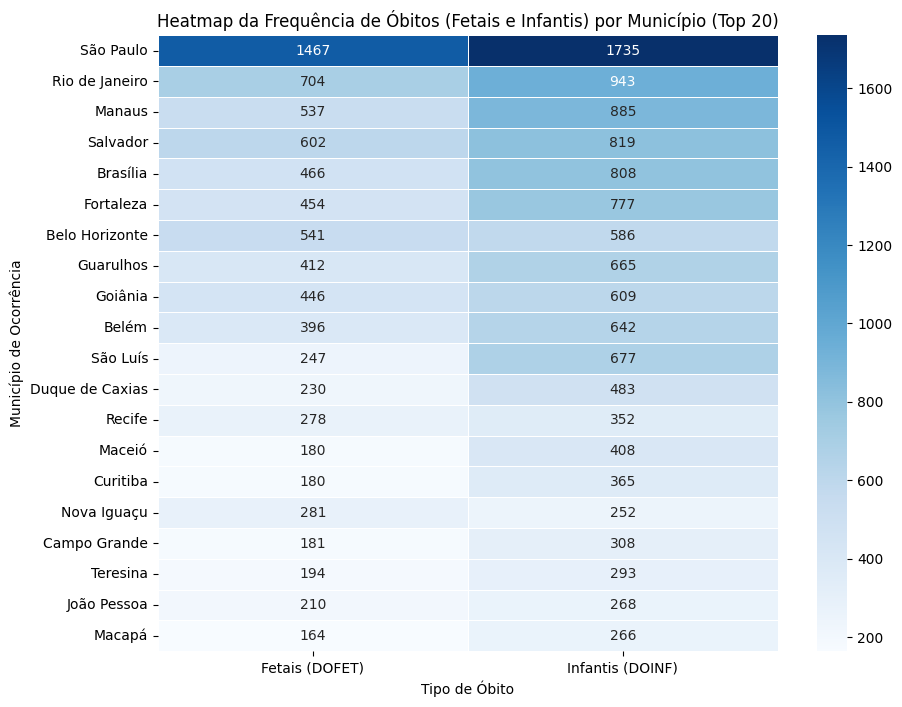

In [ ]:
# Criar tabelas de contingência para CODMUNOCOR
contingency_dofet = pd.crosstab(df_dofet23_filtrado['CODMUNOCOR'], 'count')
contingency_doinf = pd.crosstab(df_doinf23_filtrado['CODMUNOCOR'], 'count')

# Juntar os dataframes de contingência para ter todos os CODMUNOCOR em ambos
# Preenche NaN com 0 onde um CODMUNOCOR existe em um df mas não no outro
contingency_combined = pd.merge(contingency_dofet, contingency_doinf, left_index=True, right_index=True, how='outer', suffixes=('_dofet', '_doinf')).fillna(0)

# Calcular a correlação entre as frequências de CODMUNOCOR
correlation_matrix = contingency_combined.corr()

# Extrair a correlação entre as contagens de dofet e doinf
correlation_value = correlation_matrix.loc['count_dofet', 'count_doinf']
print(f"\nCorrelação entre a frequência de óbitos fetais e infantis por município (CODMUNOCOR): {correlation_value:.4f}")

# Preparar dados para o heatmap
# Vamos pegar os top N municípios com mais óbitos totais para uma visualização mais clara
top_n = 20
top_mun = contingency_combined['count_dofet'] + contingency_combined['count_doinf']
top_mun = top_mun.sort_values(ascending=False).head(top_n).index

contingency_heatmap = contingency_combined.loc[top_mun]

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_heatmap, annot=True, fmt='g', cmap='Blues', linewidths=.5)
plt.title(f'Heatmap da Frequência de Óbitos (Fetais e Infantis) por Município (Top {top_n})')
plt.xlabel('Tipo de Óbito')
plt.ylabel('Município de Ocorrência')
plt.xticks(ticks=[0.5, 1.5], labels=['Fetais (DOFET)', 'Infantis (DOINF)'])
plt.yticks(rotation=0, ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5], labels=['São Paulo', 'Rio de Janeiro', 'Manaus', 'Salvador', 'Brasília', 'Fortaleza', 'Belo Horizonte', 'Guarulhos', 'Goiânia', 'Belém', 'São Luís', 'Duque de Caxias', 'Recife', 'Maceió', 'Curitiba', 'Nova Iguaçu', 'Campo Grande', 'Teresina', 'João Pessoa', 'Macapá'])
plt.show()

Distribuição da Idade Materna

/tmp/ipython-input-16-1977000780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dofet23_filtrado['IDADEMAE'] = df_dofet23_filtrado['IDADEMAE'].replace(99, np.nan)
/tmp/ipython-input-16-1977000780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_doinf23_filtrado['IDADEMAE'] = df_doinf23_filtrado['IDADEMAE'].replace(99, np.nan)


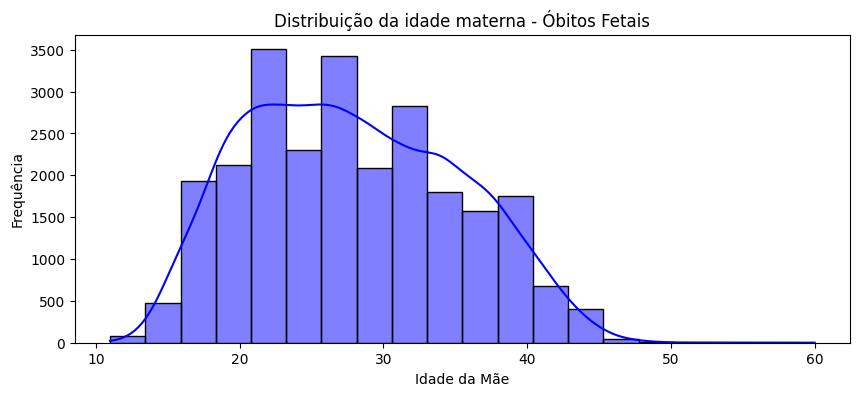

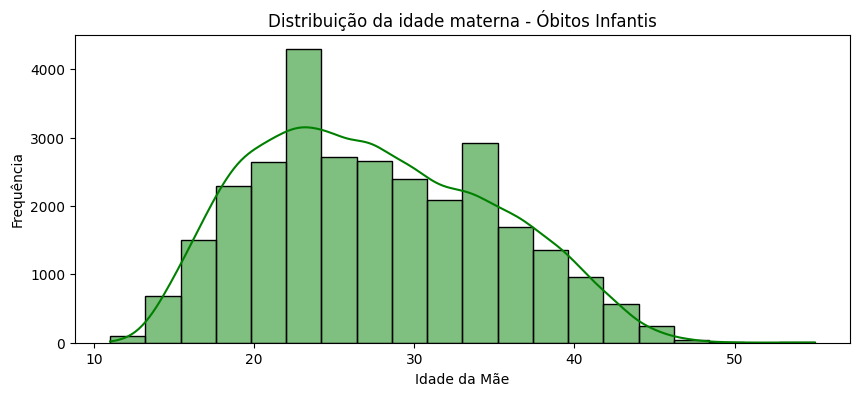

In [ ]:
# Substituir 99 por NaN na coluna IDADEMAE
df_dofet23_filtrado['IDADEMAE'] = df_dofet23_filtrado['IDADEMAE'].replace(99, np.nan)
df_doinf23_filtrado['IDADEMAE'] = df_doinf23_filtrado['IDADEMAE'].replace(99, np.nan)

# Histograma da idade materna para Óbitos Fetais com NaN tratados
plt.figure(figsize=(10, 4))
sns.histplot(df_dofet23_filtrado['IDADEMAE'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribuição da idade materna - Óbitos Fetais')
plt.xlabel('Idade da Mãe')
plt.ylabel('Frequência')
plt.show()

# Histograma da idade materna para Óbitos Infantis com NaN tratados
plt.figure(figsize=(10, 4))
sns.histplot(df_doinf23_filtrado['IDADEMAE'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribuição da idade materna - Óbitos Infantis')
plt.xlabel('Idade da Mãe')
plt.ylabel('Frequência')
plt.show()